In [1]:
import sys
sys.path.append('../')

from common_imports import *
from common_functions import *

In [2]:
df = pd.read_csv("lookup.csv")
df, weather_features = preprocess_df(df)
sequence_length = 15

In [3]:
avant_2018 = df[(df['datetime'] < '2018-01-01')]
apres_2018 = df[(df['datetime'] >= '2018-01-01')]
counties = df['county'].unique()
cities = df['name'].unique()

In [4]:
infreq_df = infrequent_over_sample(avant_2018, cities)

In [8]:
# def train_val_test(train_df, test_df, counties, sequence_length, weather_features, grouped = False):
#     # Training set
#     X_train = grouped_tt_split(counties, train_df, sequence_length, weather_features)

#     # Validation and Test splits based on time
#     validation = test_df[test_df['datetime'] < '2019-01-01']
#     test = test_df[test_df['datetime'] >= '2019-01-01']
    
#     if grouped == False:
#         X_val = tt_split(counties, validation, sequence_length, weather_features)
#         X_test = tt_split(counties, test, sequence_length, weather_features)
#     else:
#         X_val = grouped_tt_split(counties, validation, sequence_length, weather_features)
#         X_test = grouped_tt_split(counties, test, sequence_length, weather_features)

#     return (
#         X_train,
#         X_val,
#         X_test
#     )


In [5]:
X_train, X_val, X_test= train_val_test(infreq_df, apres_2018, counties, sequence_length, weather_features, grouped = True)

In [6]:
# Ensure fire labels are integers
X_train['y_fire'] = X_train['y_fire'].astype(int)
X_val['y_fire'] = X_val['y_fire'].astype(int)
X_test['y_fire'] = X_test['y_fire'].astype(int)

In [7]:
X_train_look = pd.read_csv("temp/train_norm_county.csv")

In [8]:
X_train_look

county    datetime  \
0          Modoc  2013-04-16   
1          Modoc  2013-04-17   
2          Modoc  2013-04-18   
3          Modoc  2013-04-19   
4          Modoc  2013-04-20   
...          ...         ...   
98550  Mendocino  2017-11-30   
98551  Mendocino  2017-11-30   
98552  Mendocino  2017-11-30   
98553  Mendocino  2017-11-30   
98554  Mendocino  2017-11-30   

                                            weather_data  y_fire  y_severity  
0      [[-2.22510587 -0.68350838  3.57036499  5.00633...       0    0.000000  
1      [[-1.72350768 -0.48843306 -0.15949684 -0.24987...       0    0.000000  
2      [[-1.6911465  -0.95986507 -0.15949684 -0.24987...       0    0.000000  
3      [[-1.72350768 -0.61848327  0.9258211   2.17591...       0    0.000000  
4      [[-1.98239707 -0.84607114  0.22394079  0.55839...       0    0.000000  
...                                                  ...     ...         ...  
98550  [[-1.86913296 -0.63473955 -0.15949684 -0.24987...       1    2.228939  
98551  [[-1.86913296 -0.63473955 -0.15949684 -0.24987...       1    2.227862  
98552  [[-1.86913296 -0.63473955 -0.15949684 -0.24987...       1    2.087162  
98553  [[-1.86913296 -0.63473955 -0.15949684 -0.24987...       1    2.088649  
98554  [[-1.86913296 -0.63473955 -0.15949684 -0.24987...       1    2.096913  

[98555 rows x 5 columns]

In [22]:
X_train_look.shape

(98555, 5)

In [24]:
X_train.shape

(68948, 5)

In [9]:
X_train

county   datetime  \
0          Modoc 2013-04-16   
1          Modoc 2013-04-17   
2          Modoc 2013-04-18   
3          Modoc 2013-04-19   
4          Modoc 2013-04-20   
...          ...        ...   
68943  Mendocino 2017-11-30   
68944  Mendocino 2017-11-30   
68945  Mendocino 2017-11-30   
68946  Mendocino 2017-11-30   
68947  Mendocino 2017-11-30   

                                            weather_data  y_fire  y_severity  
0      [[-2.2251058729289936, -0.683508375409802, 3.5...       0    0.000000  
1      [[-1.7235076776391742, -0.4884330615706046, -0...       0    0.000000  
2      [[-1.6911465037495086, -0.9598650700153317, -0...       0    0.000000  
3      [[-1.7235076776391742, -0.6184832707967362, 0....       0    0.000000  
4      [[-1.9823970687565005, -0.8460711369424666, 0....       0    0.000000  
...                                                  ...     ...         ...  
68943  [[-1.86913296014267, -0.6347395469500028, -0.1...       1    2.228939  
68944  [[-1.86913296014267, -0.6347395469500028, -0.1...       1    2.227862  
68945  [[-1.86913296014267, -0.6347395469500028, -0.1...       1    2.087162  
68946  [[-1.86913296014267, -0.6347395469500028, -0.1...       1    2.088649  
68947  [[-1.86913296014267, -0.6347395469500028, -0.1...       1    2.096913  

[68948 rows x 5 columns]

In [31]:
train_weather_features_1, y_train_fire1, y_train_severity1 = setup_x_and_y(X_train_look)
train_weather_features_2, y_train_fire2, y_train_severity2 = setup_x_and_y(X_train)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [26]:
train_weather_features_1

array(['[[-2.22510587 -0.68350838  3.57036499  5.00633089 -1.0559323   0.3742367\n   1.18419838  2.87076343 -0.62086075  2.40735168]\n [-1.72350768 -0.48843306 -0.15949684 -0.24987899 -1.30626536  0.42496604\n   1.73386454  2.01977825  0.184639    2.40735168]\n [-1.6911465  -0.95986507 -0.15949684 -0.24987899 -1.30626536  0.17793619\n   1.35909216  0.26991694 -0.31720473  2.40735168]\n [-1.72350768 -0.61848327  0.9258211   2.17591476  2.04541614 -0.28524479\n  -0.13999737  2.21870985 -0.46555576  2.40735168]\n [-1.98239707 -0.84607114  0.22394079  0.55839549  1.23878739  0.02905659\n   0.809426    2.54289468  0.05483184  2.40735168]\n [-1.88531355 -0.92735252  0.26476678  0.55839549  1.23878739 -0.13195394\n   0.68450187  2.57604995 -0.51307445  2.40735168]\n [-2.28982822 -0.92735252  3.52823258  4.1970861   3.32489621 -0.02167276\n  -0.78960283  2.80445289 -0.429627    2.40735168]\n [-2.77524583 -1.77267888  0.54630276  1.36764028  3.32489621  1.24435525\n   0.00991158  2.06398527  0.

In [27]:
train_weather_features_2

array([[[-2.22510587, -0.68350838,  3.57036499, ...,  2.87076343,
         -0.62086075,  2.40735168],
        [-1.72350768, -0.48843306, -0.15949684, ...,  2.01977825,
          0.184639  ,  2.40735168],
        [-1.6911465 , -0.95986507, -0.15949684, ...,  0.26991694,
         -0.31720473,  2.40735168],
        ...,
        [-2.12802235, -2.24411089, -0.15949684, ..., -0.50738987,
          0.79195104,  2.40735168],
        [-2.82378759, -2.30913599, -0.15949684, ...,  0.87407958,
          0.46395618,  2.40735168],
        [-3.00177405, -1.90272909,  2.3210899 , ...,  2.31080781,
         -0.22564433,  2.40735168]],

       [[-1.72350768, -0.48843306, -0.15949684, ...,  2.01977825,
          0.184639  ,  2.40735168],
        [-1.6911465 , -0.95986507, -0.15949684, ...,  0.26991694,
         -0.31720473,  2.40735168],
        [-1.72350768, -0.61848327,  0.9258211 , ...,  2.21870985,
         -0.46555576,  2.40735168],
        ...,
        [-2.82378759, -2.30913599, -0.15949684, ...,  

In [30]:
import ast
def setup_x_and_y(train):
    train['weather_data'] = train['weather_data'].apply(ast.literal_eval)
    train_weather_features = np.stack(train['weather_data'].values)

    y_train_fire = np.stack(train['y_fire'].values)
    y_train_fire = y_train_fire.astype(int)
    y_train_severity = np.stack(train['y_severity'].values)

    return train_weather_features, y_train_fire, y_train_severity

In [11]:
param_grid = {
    'lstm_units': [(64,), (64, 128), (128,), (32, 64), (32,), (32,64, 128)],
    'dropout_rates': [0.2, 0.3, 0.4],
    'batch_norm': [True, False],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'reg_l2': [0.01, 0.001, 0.0001]
}



In [12]:
from sklearn.model_selection import TimeSeriesSplit

def randomized_cv_search(X_train, counties, param_grid, n_iter=1, cv_folds=1):
    results = []

    for county in counties:
        county_train_data = X_train[X_train["county"] == county]
        # county_val_data = X_val[X_val["county"] == county]

        if county_train_data.empty:
            print(f"No data available for county: {county}")
            continue  # Skip this county if no data is available

        try:
            # Setup features and labels
            train_weather_features, y_train_fire, y_train_severity = setup_x_and_y(county_train_data)
        except ValueError as e:
            print(f"Error processing data for county {county}: {e}")
            continue

        # Define TimeSeriesSplit iterator (don't shuffle data)
        tscv = TimeSeriesSplit(n_splits=cv_folds)

        for fold, (train_idx, val_idx) in enumerate(tscv.split(train_weather_features)):
            # Split into training and validation for this fold
            fold_train_features = train_weather_features[train_idx]
            fold_val_features = train_weather_features[val_idx]
            fold_y_train_fire = y_train_fire[train_idx]
            fold_y_val_fire = y_train_fire[val_idx]
            fold_y_train_severity = y_train_severity[train_idx]
            fold_y_val_severity = y_train_severity[val_idx]

            for _ in range(n_iter):
                # Randomly sample hyperparameters
                params = {k: random.choice(v) for k, v in param_grid.items()}

                # Create and train the model
                model = create_lstm_model(
                    sequence_length=fold_train_features.shape[1],
                    weather_features=fold_train_features.shape[2],
                    **params
                )

                try:
                    model.fit(
                        x=fold_train_features,
                        y={'fire_output': fold_y_train_fire, 'severity_output': fold_y_train_severity},
                        validation_data=(fold_val_features, {'fire_output': fold_y_val_fire, 'severity_output': fold_y_val_severity}),
                        epochs=10,
                        batch_size=64,
                        verbose=2
                    )

                    # Evaluate the model
                    eval_metrics = model.evaluate(
                        fold_val_features, 
                        {'fire_output': fold_y_val_fire, 'severity_output': fold_y_val_severity},
                        verbose=0
                    )

                    # Dynamically extract all metrics based on the compiled model's outputs
                    metric_names = model.metrics_names  # Retrieve the names of the metrics
                    metrics_dict = {name: value for name, value in zip(metric_names, eval_metrics)}

                    # Add to results, organizing metrics by task
                    results.append({
                        'county': county,
                        'fold': fold,
                        'params': params,
                        'metrics': metrics_dict
                    })

                except Exception as e:
                    print(f"Error training or evaluating for county {county}, fold {fold}: {e}")
                    continue

    return results


In [14]:
results = randomized_cv_search(X_train_look, counties, param_grid, n_iter=1, cv_folds=2)

IndexError: tuple index out of range

In [30]:
best_results_loss = {}
for county in counties:
    county_results = [r for r in results if r['county'] == county]
    best_results_loss[county] = min(county_results, key=lambda x: x['metrics']['fire_output_loss'])



In [31]:
best_results_loss

{'Modoc': {'county': 'Modoc',
  'fold': 1,
  'params': {'lstm_units': (32,),
   'dropout_rates': 0.4,
   'batch_norm': False,
   'learning_rate': 0.001,
   'reg_l2': 0.0001},
  'metrics': {'loss': 1.7329767942428589,
   'compile_metrics': 1.1408429145812988,
   'fire_output_loss': 0.5747973322868347,
   'severity_output_loss': 0.0}},
 'Contra Costa': {'county': 'Contra Costa',
  'fold': 1,
  'params': {'lstm_units': (32, 64),
   'dropout_rates': 0.3,
   'batch_norm': True,
   'learning_rate': 0.0005,
   'reg_l2': 0.001},
  'metrics': {'loss': 0.4550746977329254,
   'compile_metrics': 0.23023958504199982,
   'fire_output_loss': 0.15477131307125092,
   'severity_output_loss': 0.8617693781852722}},
 'Kern': {'county': 'Kern',
  'fold': 1,
  'params': {'lstm_units': (64,),
   'dropout_rates': 0.3,
   'batch_norm': True,
   'learning_rate': 0.001,
   'reg_l2': 0.01},
  'metrics': {'loss': 1.1638890504837036,
   'compile_metrics': 0.5718159675598145,
   'fire_output_loss': 0.5110020041465759

In [32]:
def county_model_performance_best_params(X_train, X_val, best_results, patience=10, threshold=0.8):
    """
    Train models for each county using the best parameters and return history and predictions.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    all_histories = {}
    y_train_true_fire = []
    y_train_pred_fire = []
    y_val_true_fire = []
    y_val_pred_fire = []
    y_train_true_severity = []
    y_train_pred_severity = []
    y_val_true_severity = []
    y_val_pred_severity = []

    for county, result in best_results.items():
        print(f"Training model for county: {county}")

        best_params = result['params']

        # Filter data for the current county
        county_train_data = X_train[X_train["county"] == county]
        county_val_data = X_val[X_val["county"] == county]

        if county_train_data.empty or county_val_data.empty:
            print(f"No data available for county: {county}")
            continue

        # Setup features and targets
        train_weather_features, val_weather_features, y_train_fire, y_train_severity, y_val_fire, y_val_severity = setup_x_and_y(county_train_data, county_val_data)

        # Create model with best parameters
        model = create_lstm_model(
            sequence_length=sequence_length, 
            weather_features=train_weather_features.shape[2],
            **best_params
        )

        # Correct the filepath formatting for ModelCheckpoint
        checkpoint_filepath = f'best_model_{county}.keras'
        model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_loss')

        # Train the model
        county_history = model.fit(
            x=train_weather_features,
            y={'fire_output': y_train_fire, 'severity_output': y_train_severity},
            validation_data=(
                val_weather_features,
                {'fire_output': y_val_fire, 'severity_output': y_val_severity}
            ),
            epochs=50,
            batch_size=64,
            callbacks=[early_stopping, model_checkpoint],
            verbose=0
        )

        # Store training history
        all_histories[county] = county_history.history
        
        # True values
        y_train_true_fire.append(y_train_fire)
        y_val_true_fire.append(y_val_fire)
        y_train_true_severity.append(y_train_severity)
        y_val_true_severity.append(y_val_severity)

        # Predict probabilities
        y_train_pred_fire_proba = model.predict(train_weather_features, verbose=0)['fire_output']
        y_val_pred_fire_proba = model.predict(val_weather_features, verbose=0)['fire_output']

        # Apply threshold for fire output
        y_train_pred_fire.append((y_train_pred_fire_proba > threshold).astype(int))
        y_val_pred_fire.append((y_val_pred_fire_proba > threshold).astype(int))

        # Predict severity output
        y_train_pred_severity.append(model.predict(train_weather_features, verbose=0)['severity_output'])
        y_val_pred_severity.append(model.predict(val_weather_features, verbose=0)['severity_output'])

    return all_histories, y_train_true_fire, y_train_pred_fire, y_val_true_fire, y_val_pred_fire, y_train_true_severity, y_train_pred_severity, y_val_true_severity, y_val_pred_severity


In [33]:
histories, train_true_fire, train_pred_fire, val_true_fire, val_pred_fire, train_true_severity, train_pred_severity, val_true_severity, val_pred_severity = county_model_performance_best_params(
    X_train, X_val, best_results_loss, patience=10, threshold=0.8
)

Training model for county: Modoc
Training model for county: Contra Costa
Training model for county: Kern
Training model for county: San Bernardino
Training model for county: Fresno
Training model for county: San Diego
Training model for county: Riverside
Training model for county: Del Norte
Training model for county: Imperial
Training model for county: Sacramento
Training model for county: Los Angeles
Training model for county: Stanislaus
Training model for county: Ventura
Training model for county: San Luis Obispo
Training model for county: Shasta
Training model for county: Placer
Training model for county: Santa Barbara
Training model for county: Sonoma
Training model for county: El Dorado
Training model for county: Lassen
Training model for county: Mendocino


In [34]:
def plot_best_model_performance(histories, y_train_true, y_train_pred_proba, y_val_true, y_val_pred_proba, counties, threshold=0.8):
    """
    Plots the performance metrics of the model training and validation,
    including loss, accuracy, and ROC curves for each county.
    
    Parameters:
    - histories: Dictionary of training history metrics for each county.
    - counties: List of county names to plot performance for.
    - threshold: Threshold for binary classification.
    """

    # Use the dictionary for plotting
    for idx, county in enumerate(counties):
        if county not in histories:
            print(f"No history data for county: {county}")
            continue

        metrics = histories[county]
        print(f"Processing data for county: {county}")
   
        # Compute ROC curves and AUC for training and validation
        fpr_train, tpr_train, _ = roc_curve(y_train_true[idx], y_train_pred_proba[idx])
        roc_auc_train = auc(fpr_train, tpr_train)
        
        fpr_val, tpr_val, _ = roc_curve(y_val_true[idx], y_val_pred_proba[idx])
        roc_auc_val = auc(fpr_val, tpr_val)

        # Plotting the metrics for each county
        fig, ax = plt.subplots(2, 2, figsize=(12, 10))

        # Loss Plot
        ax[0, 0].plot(metrics['loss'], label='Training Loss', color='blue')
        ax[0, 0].plot(metrics['val_loss'], label='Validation Loss', color='orange')
        ax[0, 0].set_title(f'{county} - Training and Validation Loss Over Epochs')
        ax[0, 0].set_xlabel('Epochs')
        ax[0, 0].set_ylabel('Loss')
        ax[0, 0].legend()
        ax[0, 0].grid(True)

        # Accuracy Plot
        ax[0, 1].plot(metrics['fire_output_accuracy'], label='Training Accuracy', color='green')
        ax[0, 1].plot(metrics['val_fire_output_accuracy'], label='Validation Accuracy', color='red')
        ax[0, 1].set_title(f'{county} - Training and Validation Accuracy Over Epochs')
        ax[0, 1].set_xlabel('Epochs')
        ax[0, 1].set_ylabel('Accuracy')
        ax[0, 1].legend()
        ax[0, 1].grid(True)

        # ROC Curve Plot (placeholders; real values needed)
        if fpr_train.size > 0 and tpr_train.size > 0:
            ax[1, 0].plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})', color='blue')
            ax[1, 0].plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {roc_auc_val:.2f})', color='orange')
            ax[1, 0].plot([0, 1], [0, 1], 'k--', label='Chance Level')
            ax[1, 0].set_title(f'{county} - ROC Curve')
            ax[1, 0].set_xlabel('False Positive Rate')
            ax[1, 0].set_ylabel('True Positive Rate')
            ax[1, 0].legend()
            ax[1, 0].grid(True)
        else:
            ax[1, 0].axis('off')  # Hide plot if data is unavailable

        # F1 Score Plot
        if 'fire_output_f1_score' in metrics:
            ax[1, 1].plot(metrics['fire_output_f1_score'], label='Training F1 Score', color='green')
            ax[1, 1].plot(metrics['val_fire_output_f1_score'], label='Validation F1 Score', color='red')
            ax[1, 1].set_title(f'{county} - Training and Validation F1 Over Epochs')
            ax[1, 1].set_xlabel('Epochs')
            ax[1, 1].set_ylabel('F1 Score')
            ax[1, 1].legend()
            ax[1, 1].grid(True)
        else:
            ax[1, 1].axis('off')  # Hide plot if F1 data is unavailable

        plt.tight_layout()
        plt.show()


Processing data for county: Modoc


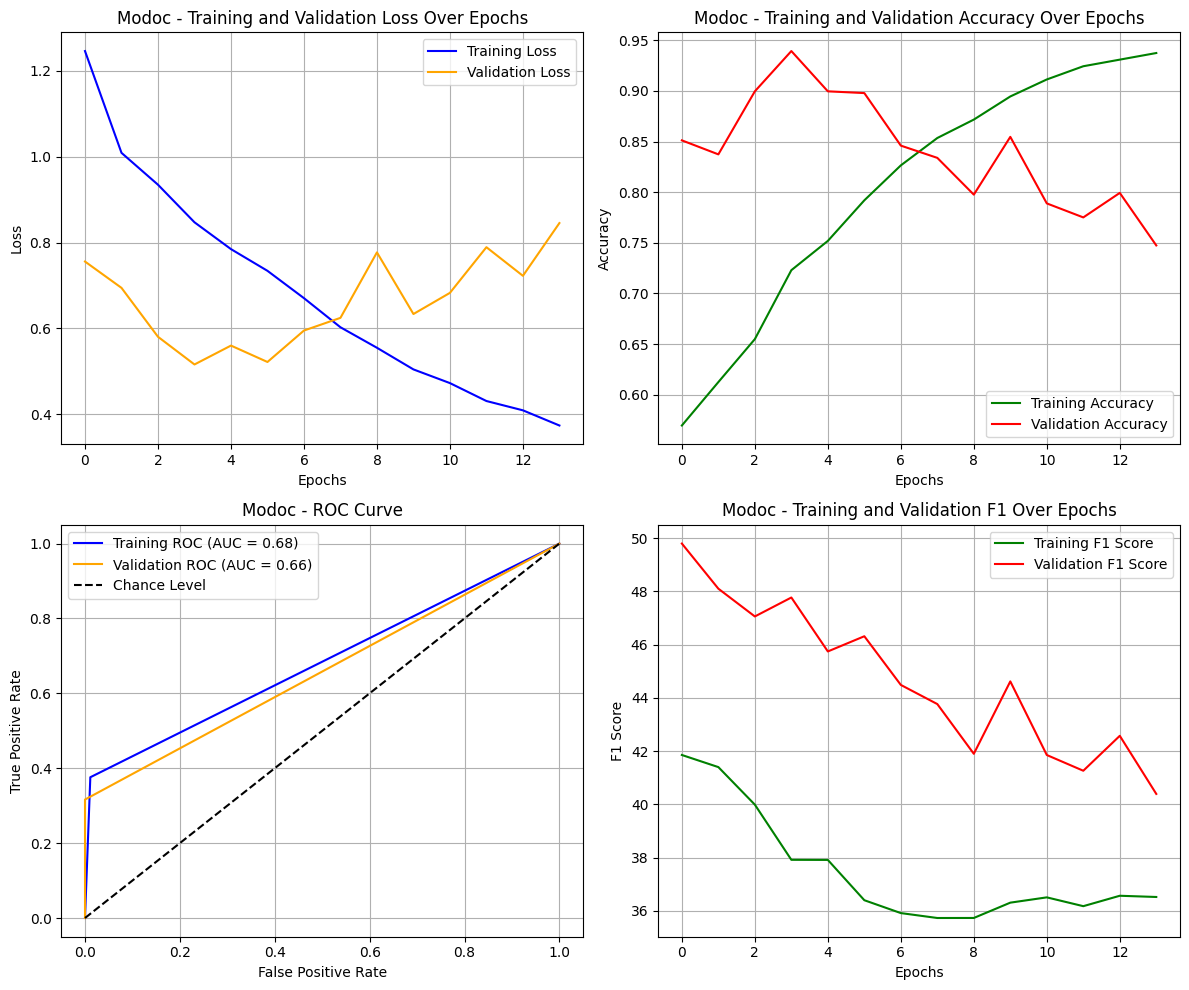

Processing data for county: Contra Costa


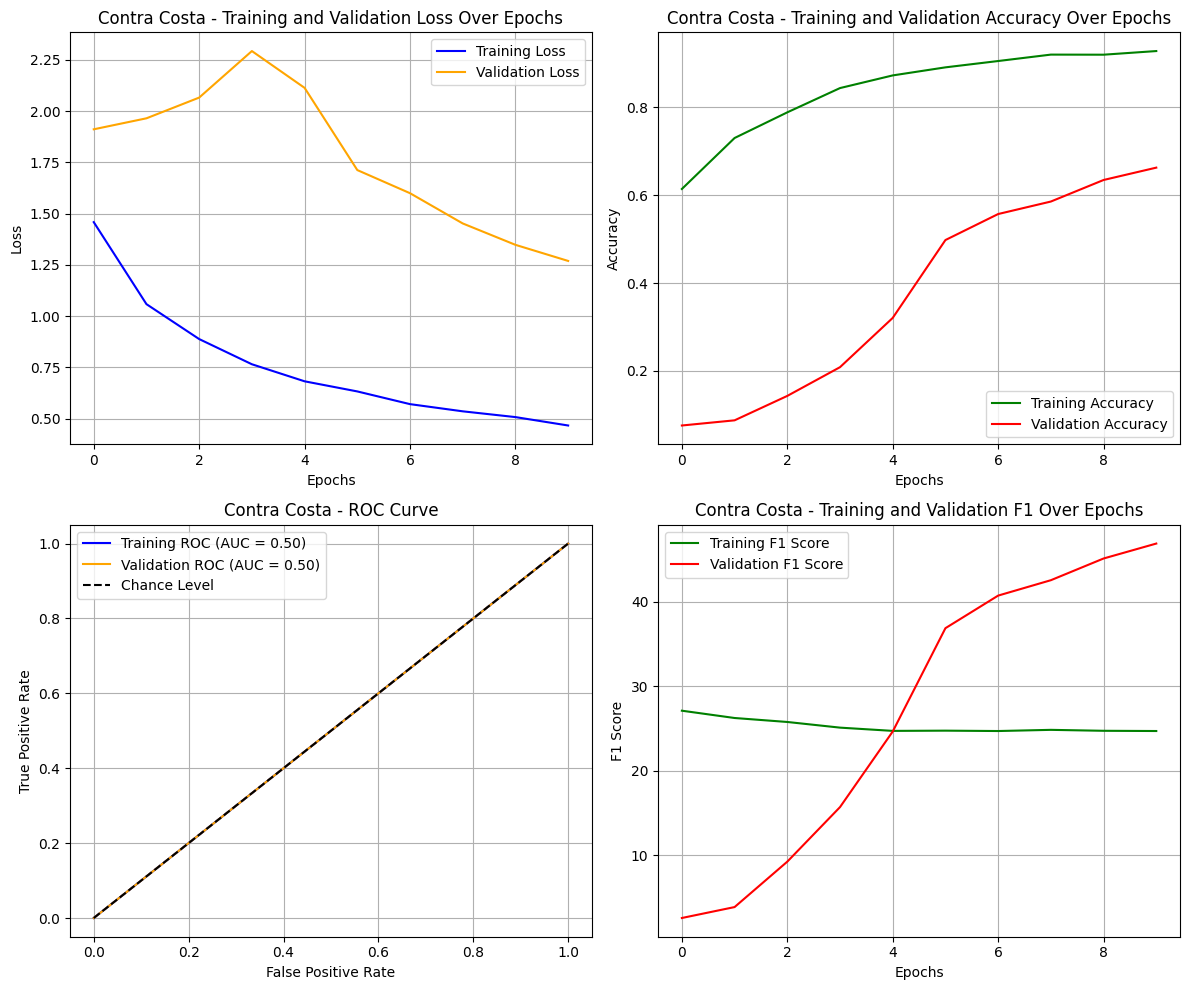

Processing data for county: Kern


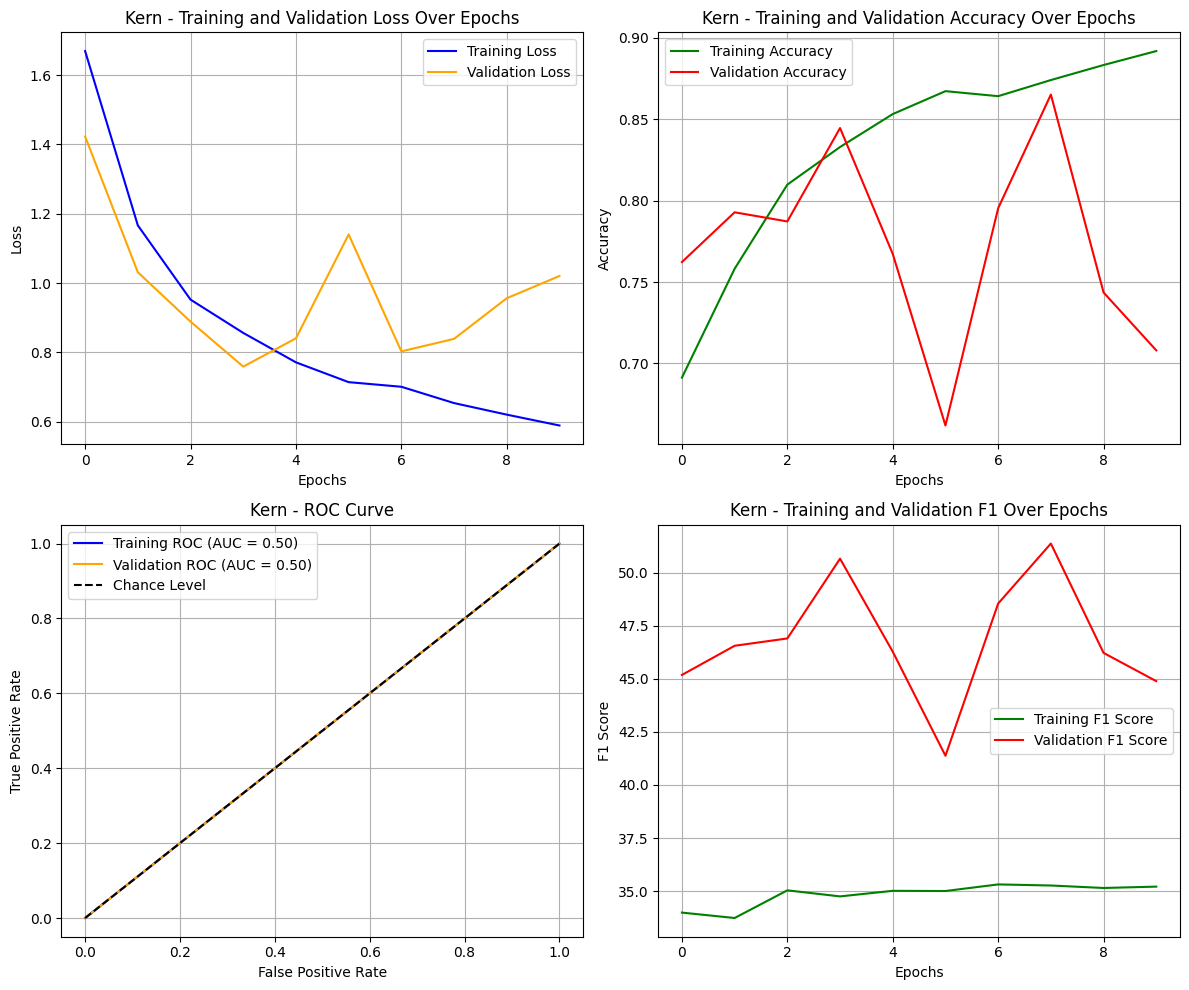

Processing data for county: San Bernardino


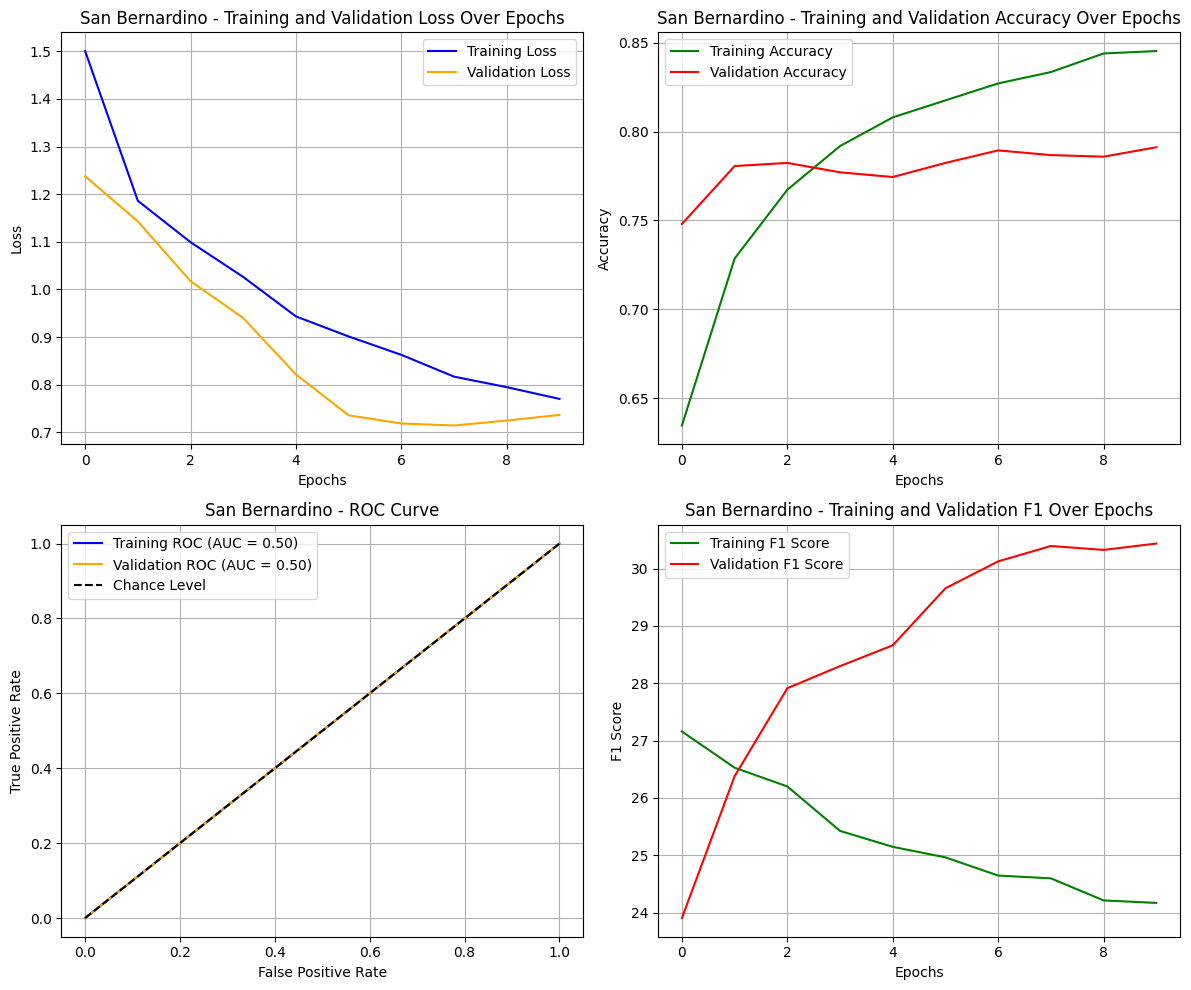

Processing data for county: Fresno


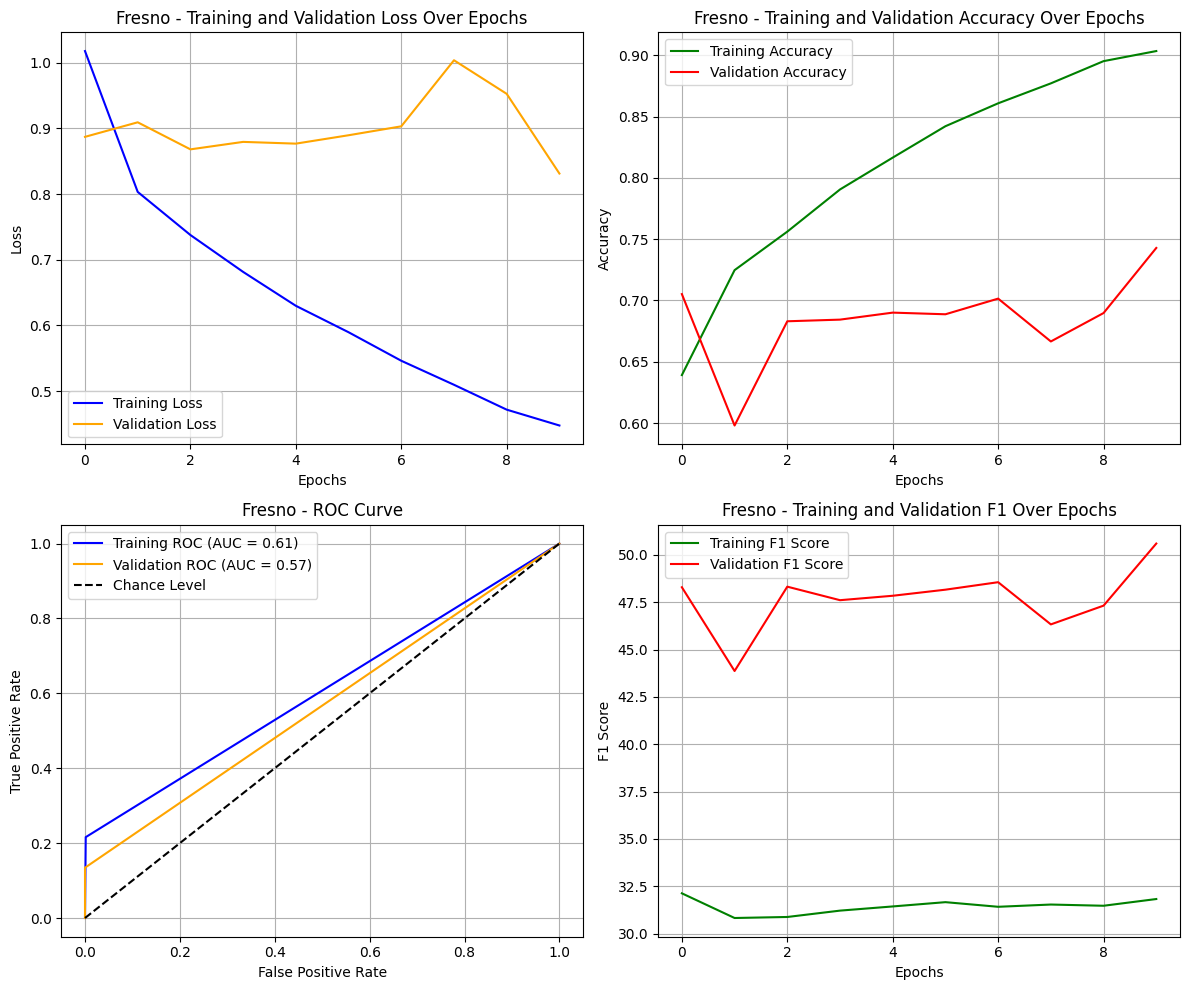

Processing data for county: San Diego


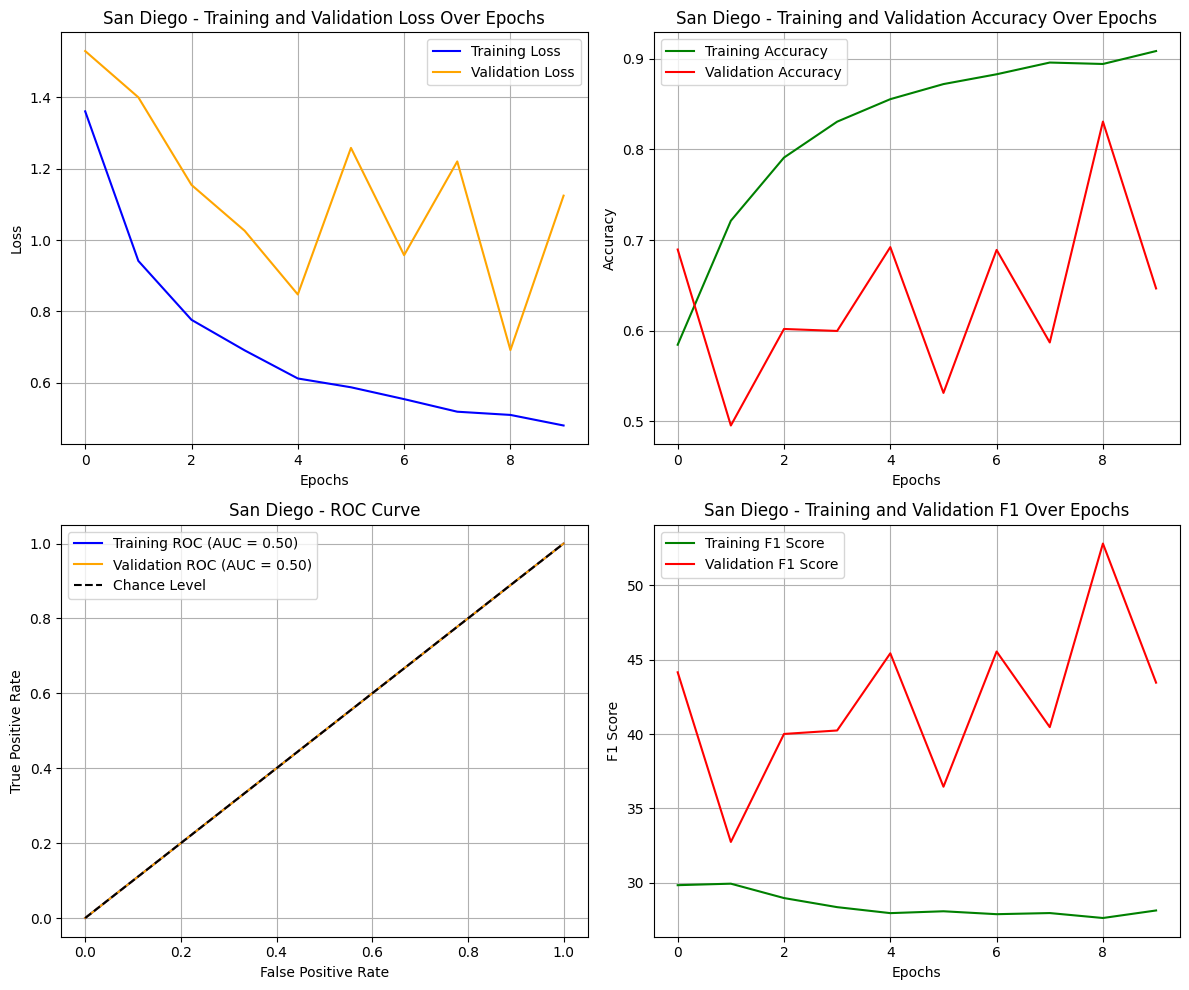

Processing data for county: Riverside


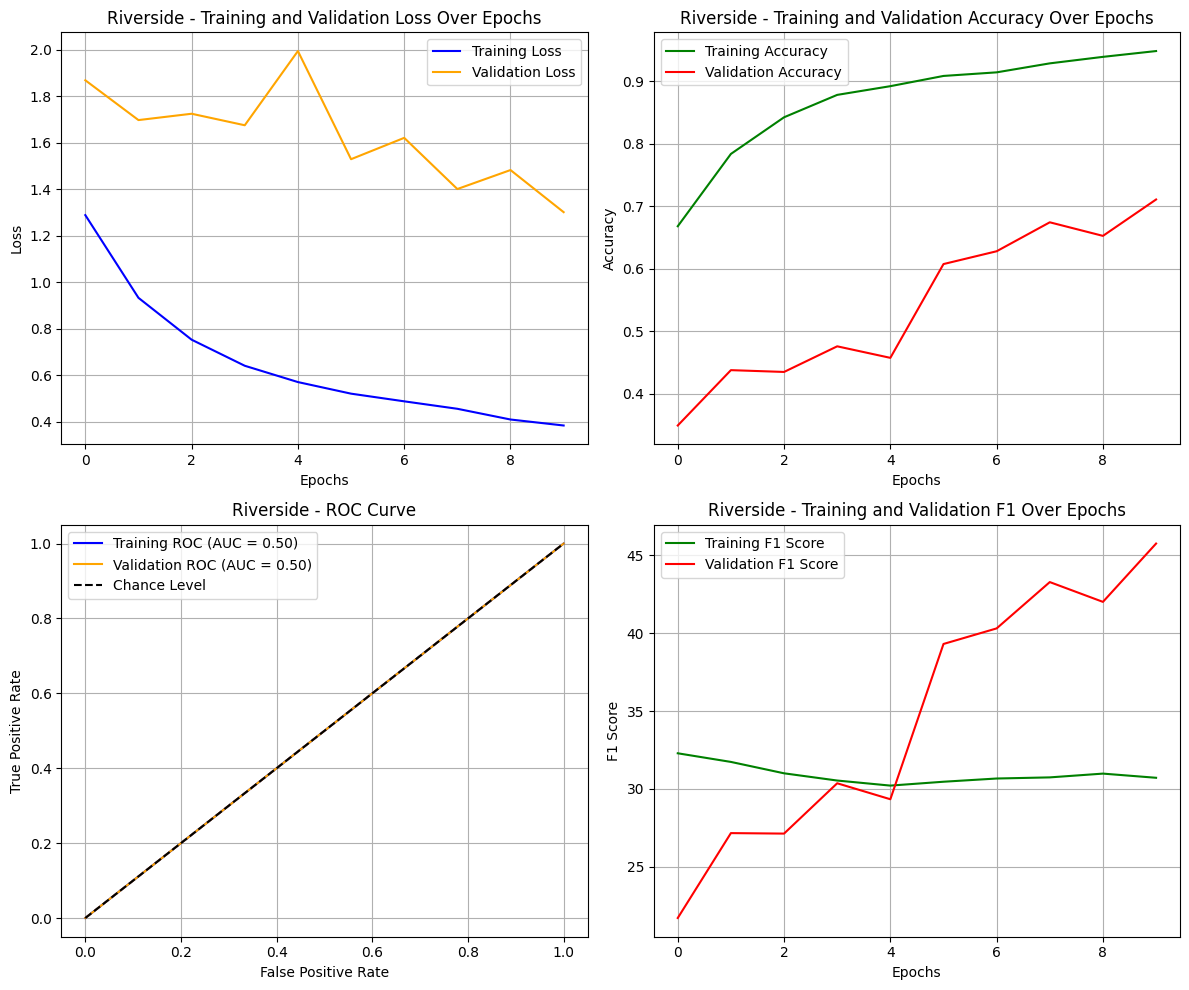

Processing data for county: Del Norte


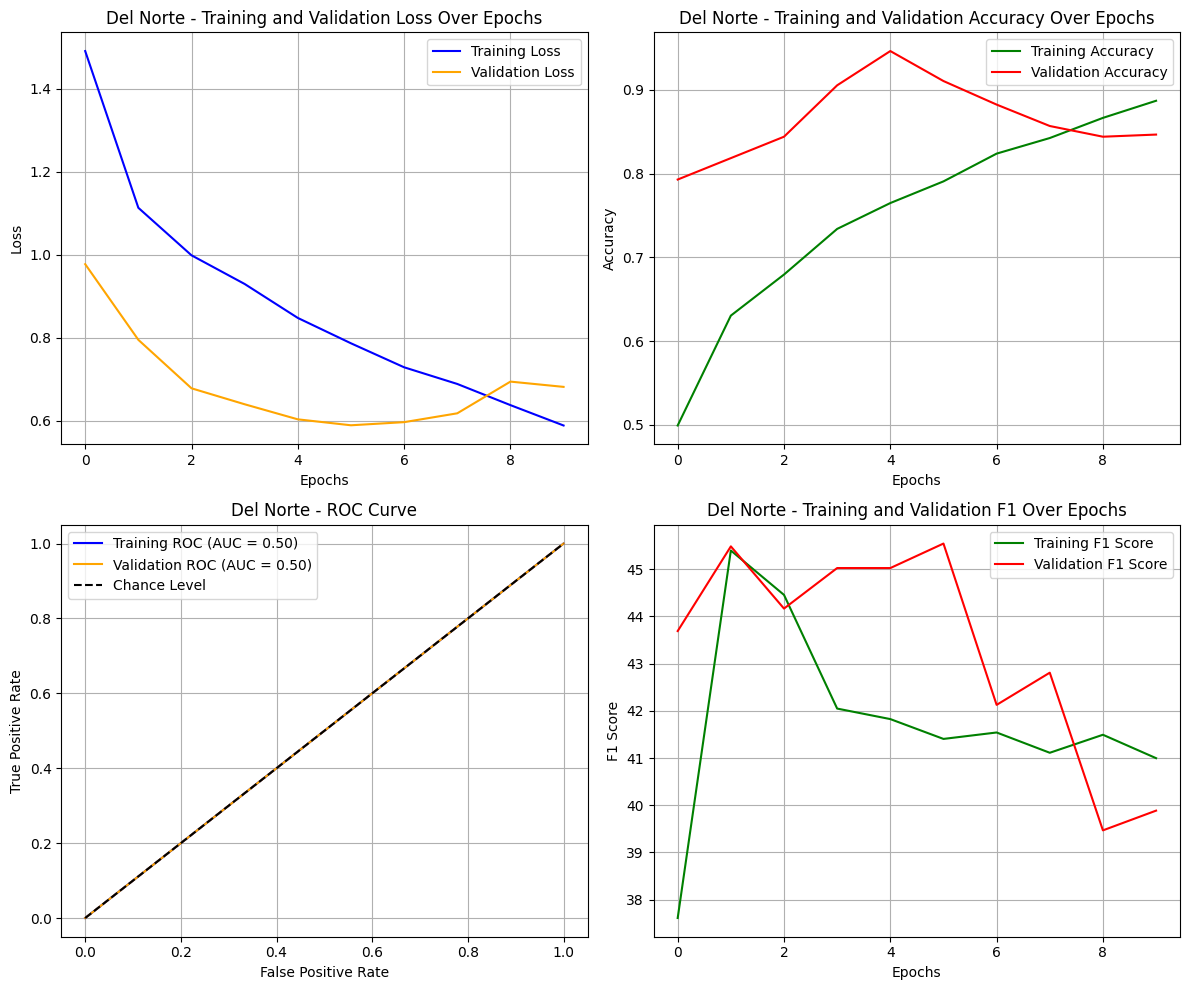

Processing data for county: Imperial


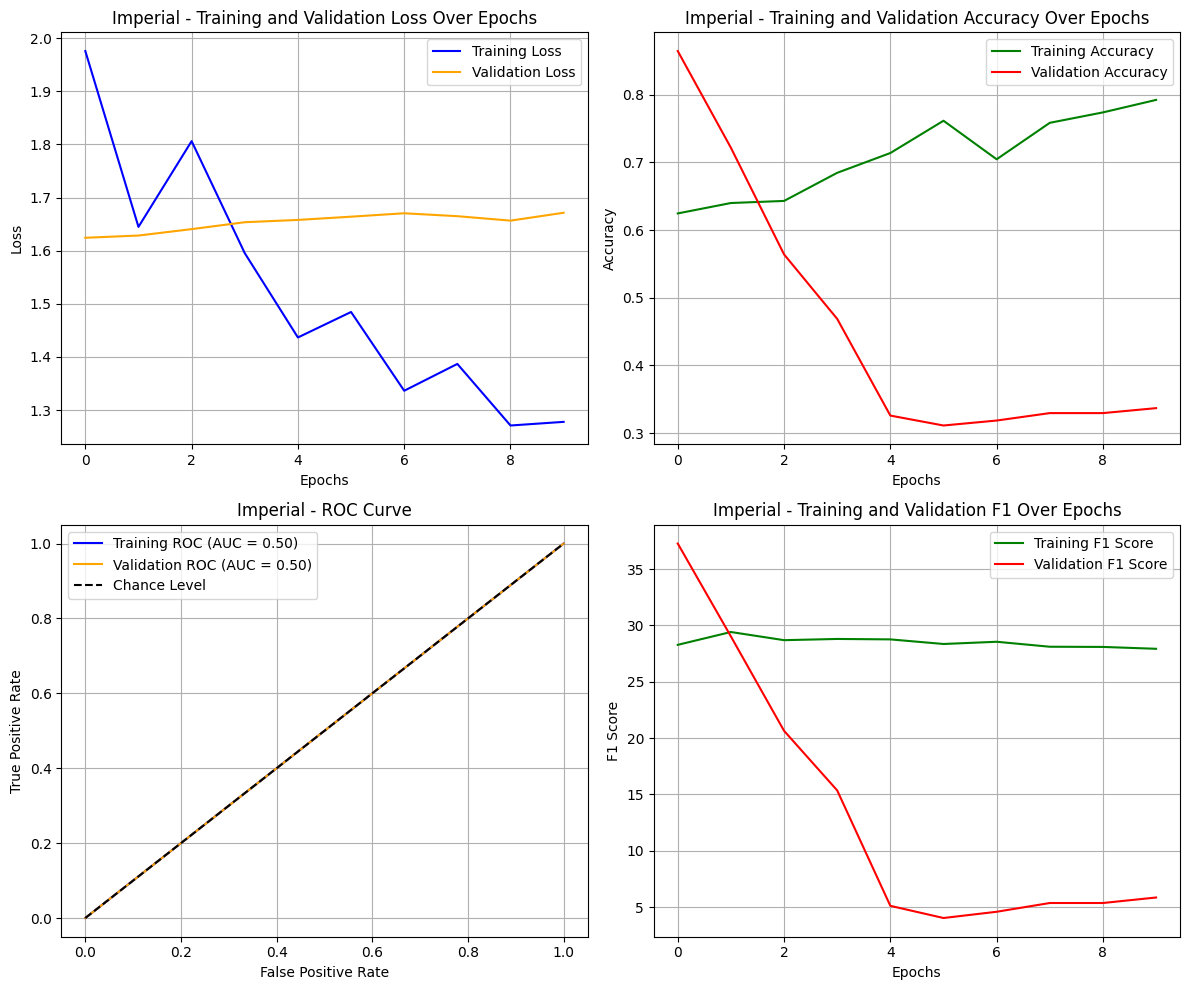

Processing data for county: Sacramento


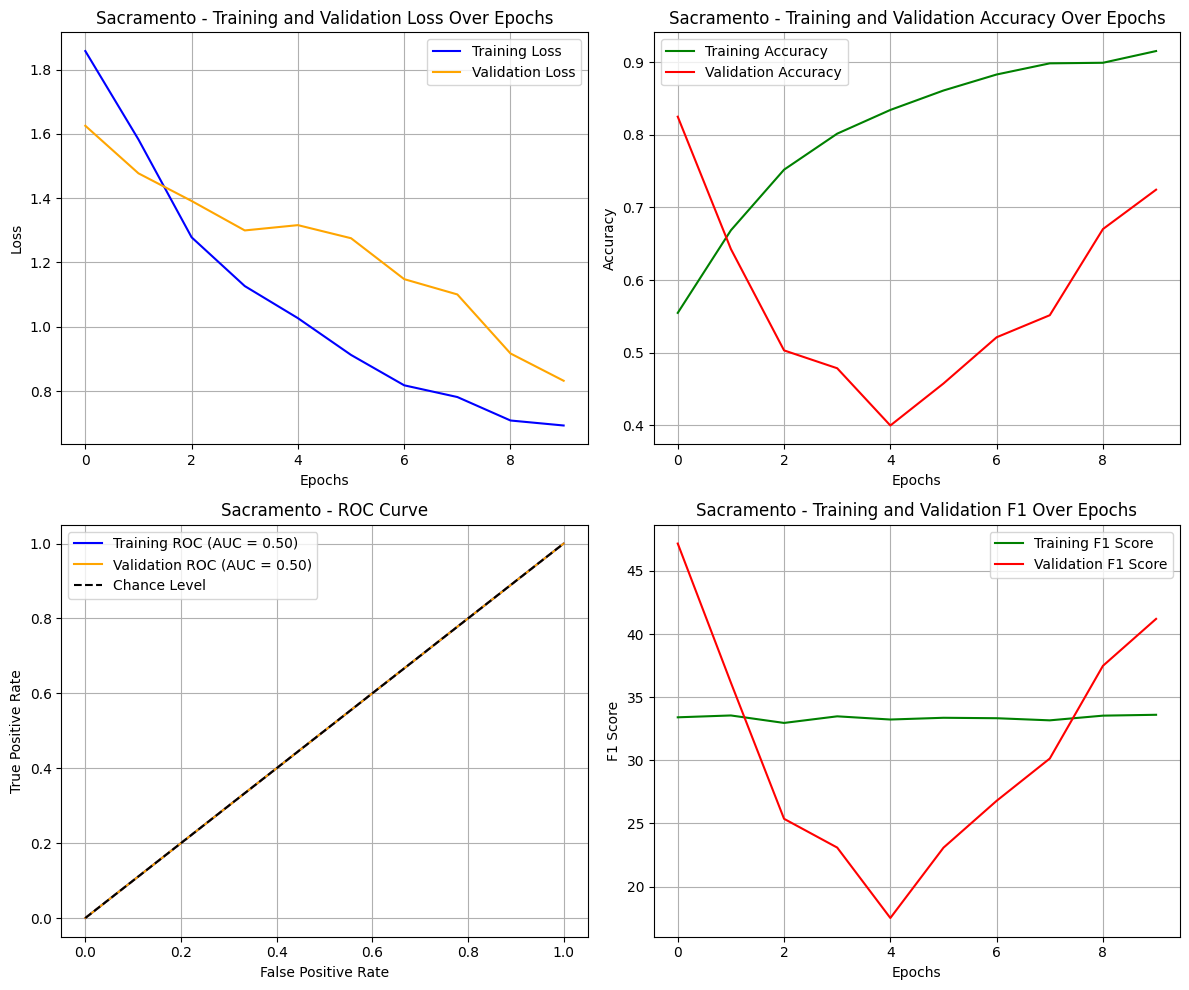

Processing data for county: Los Angeles


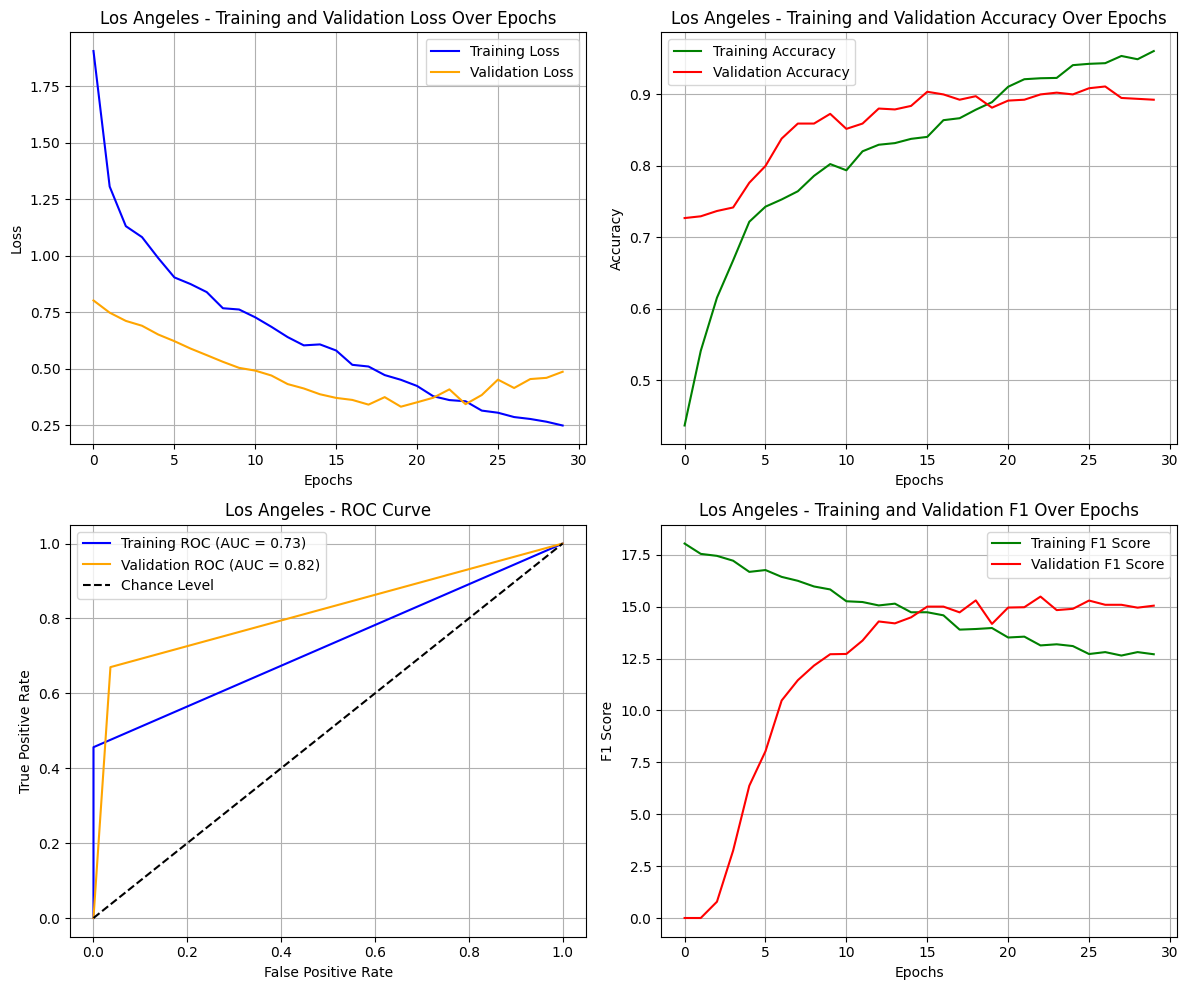

Processing data for county: Stanislaus


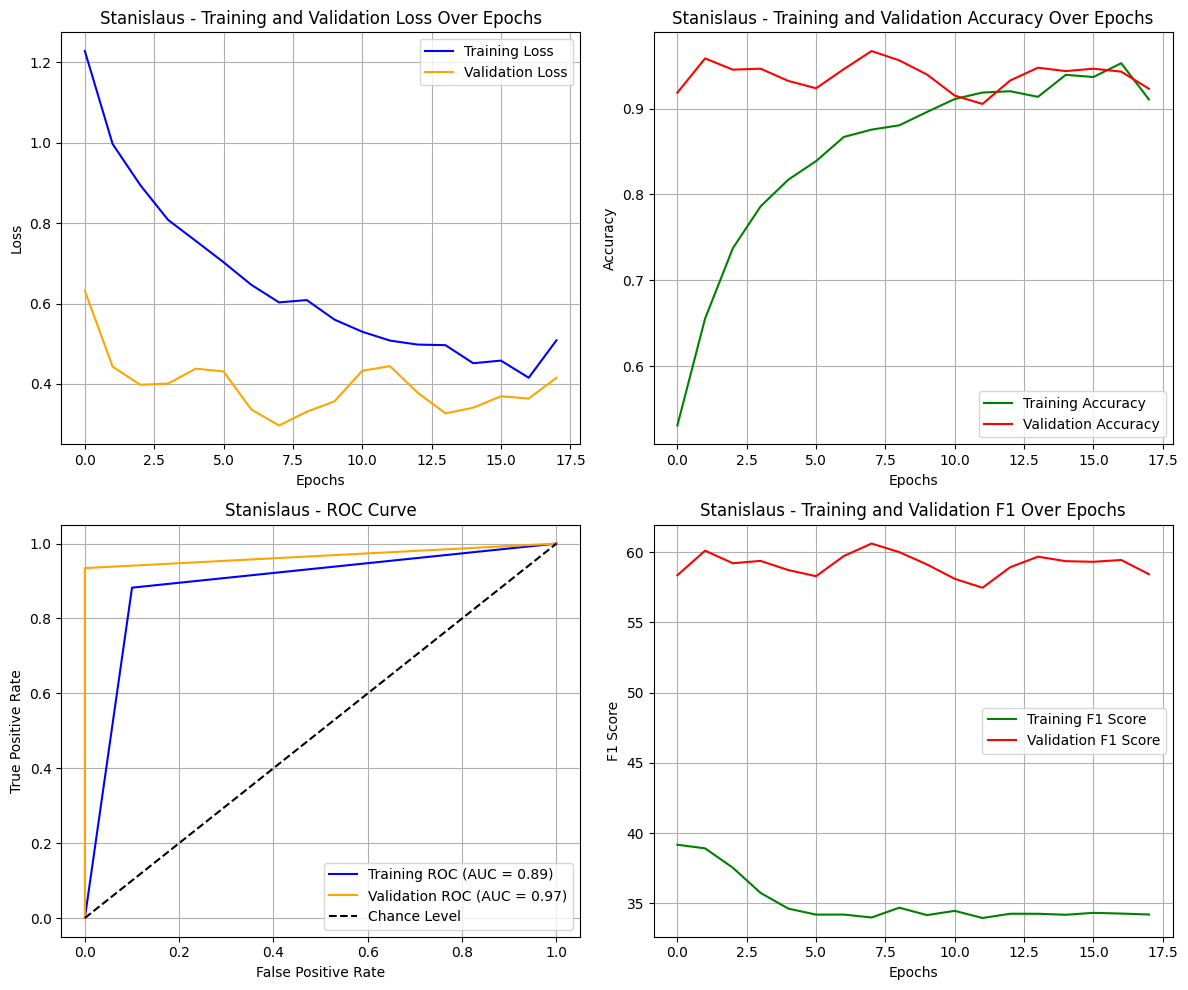

Processing data for county: Ventura


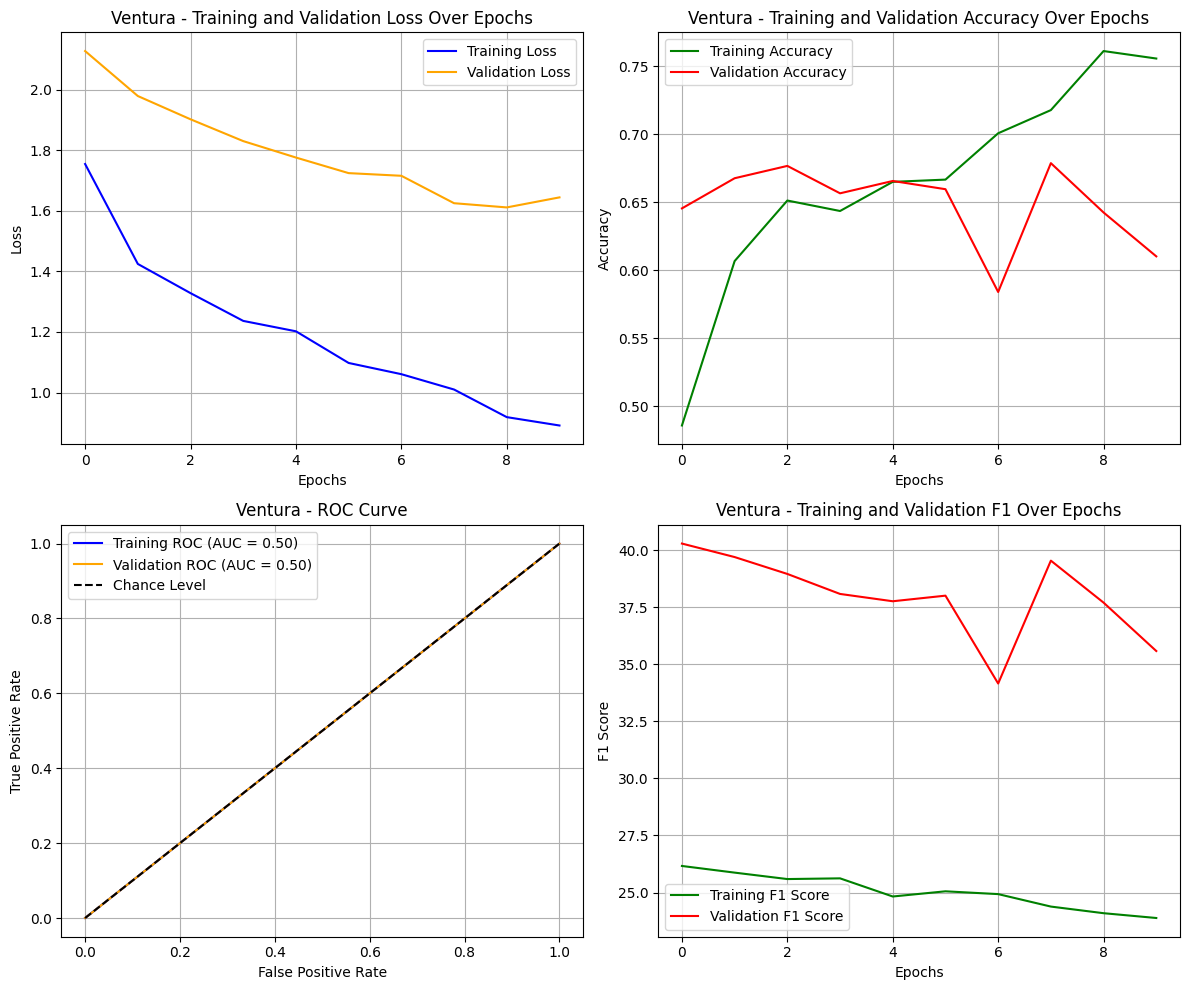

Processing data for county: San Luis Obispo


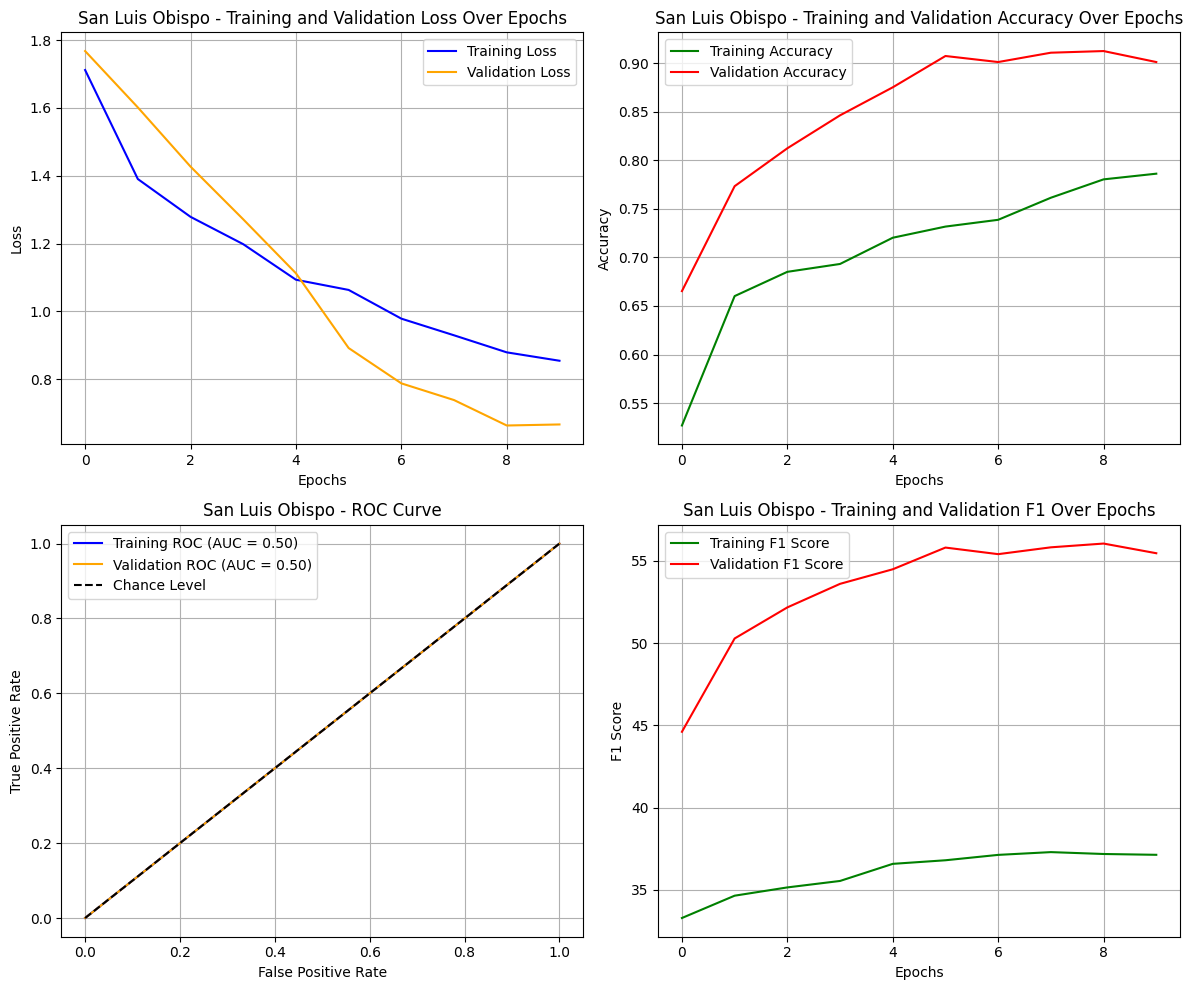

Processing data for county: Shasta


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


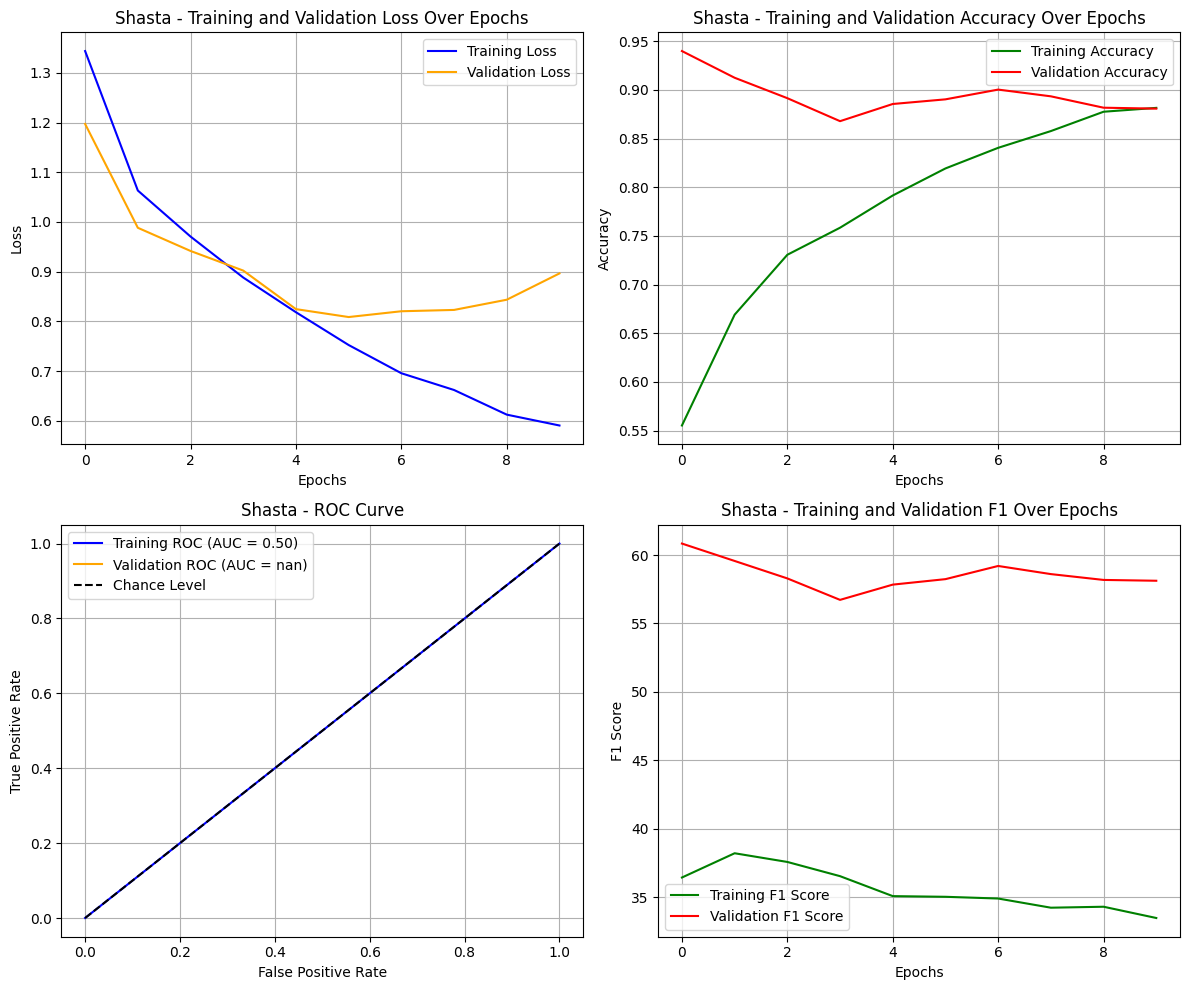

Processing data for county: Placer


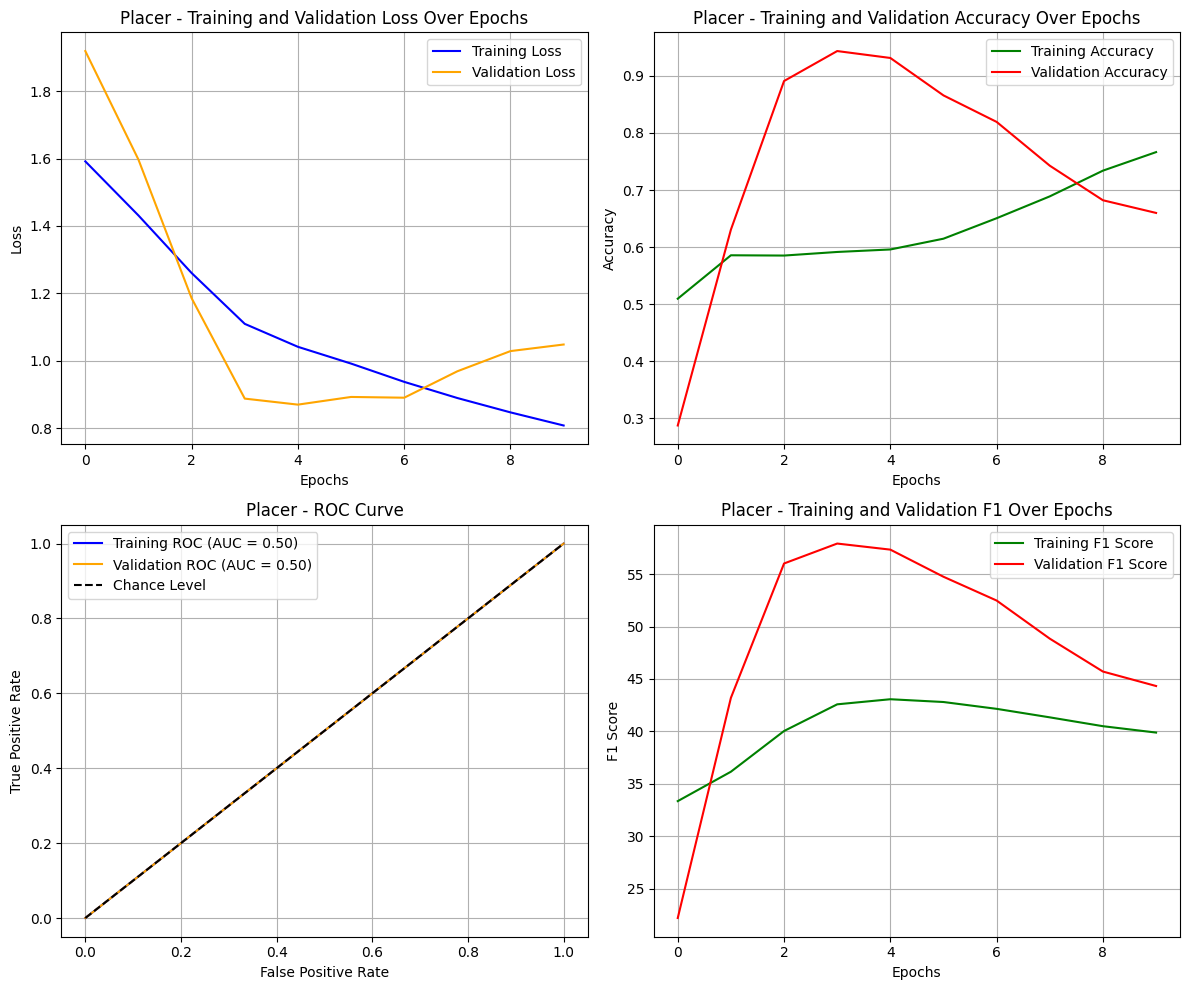

Processing data for county: Santa Barbara


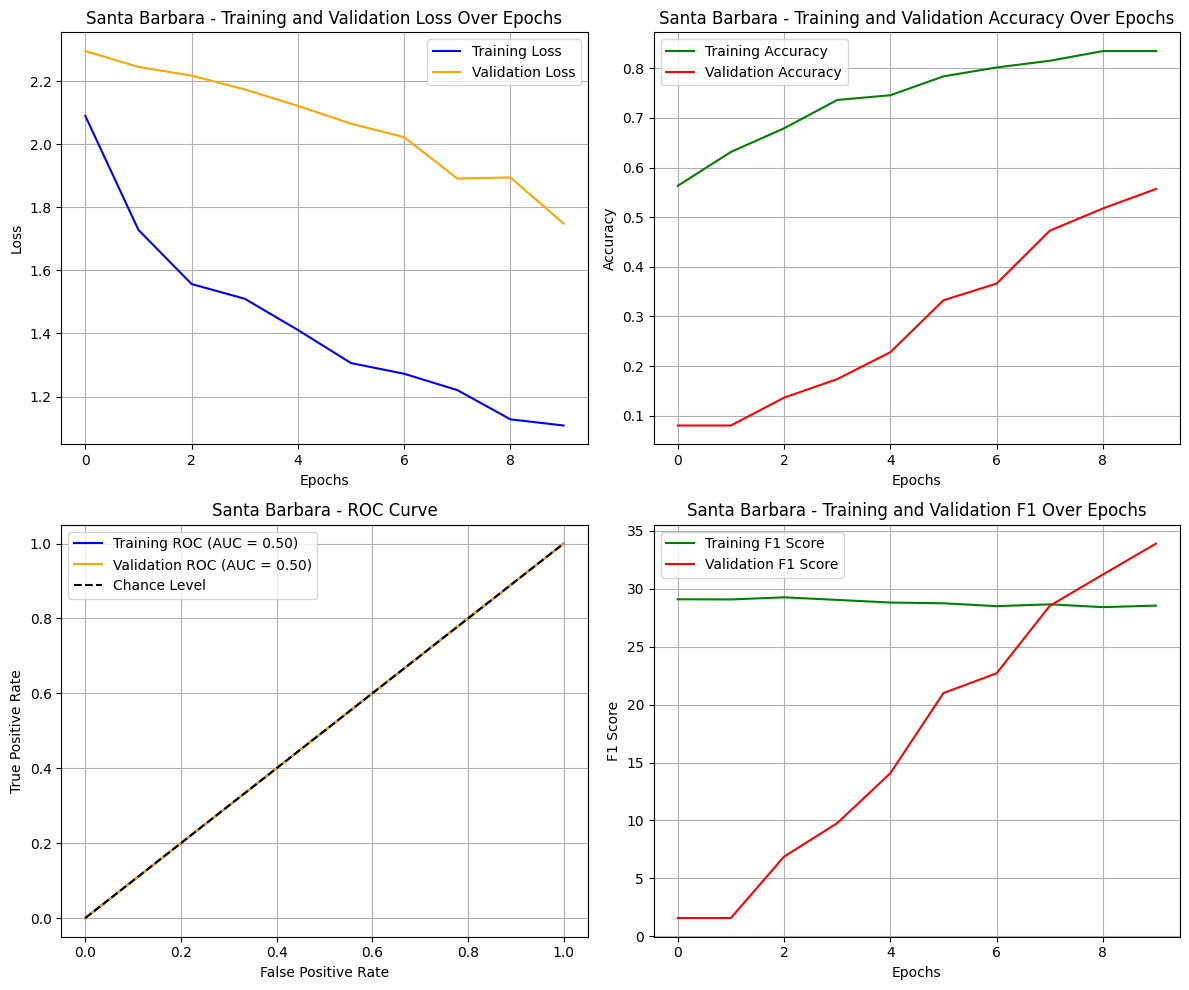

Processing data for county: Sonoma


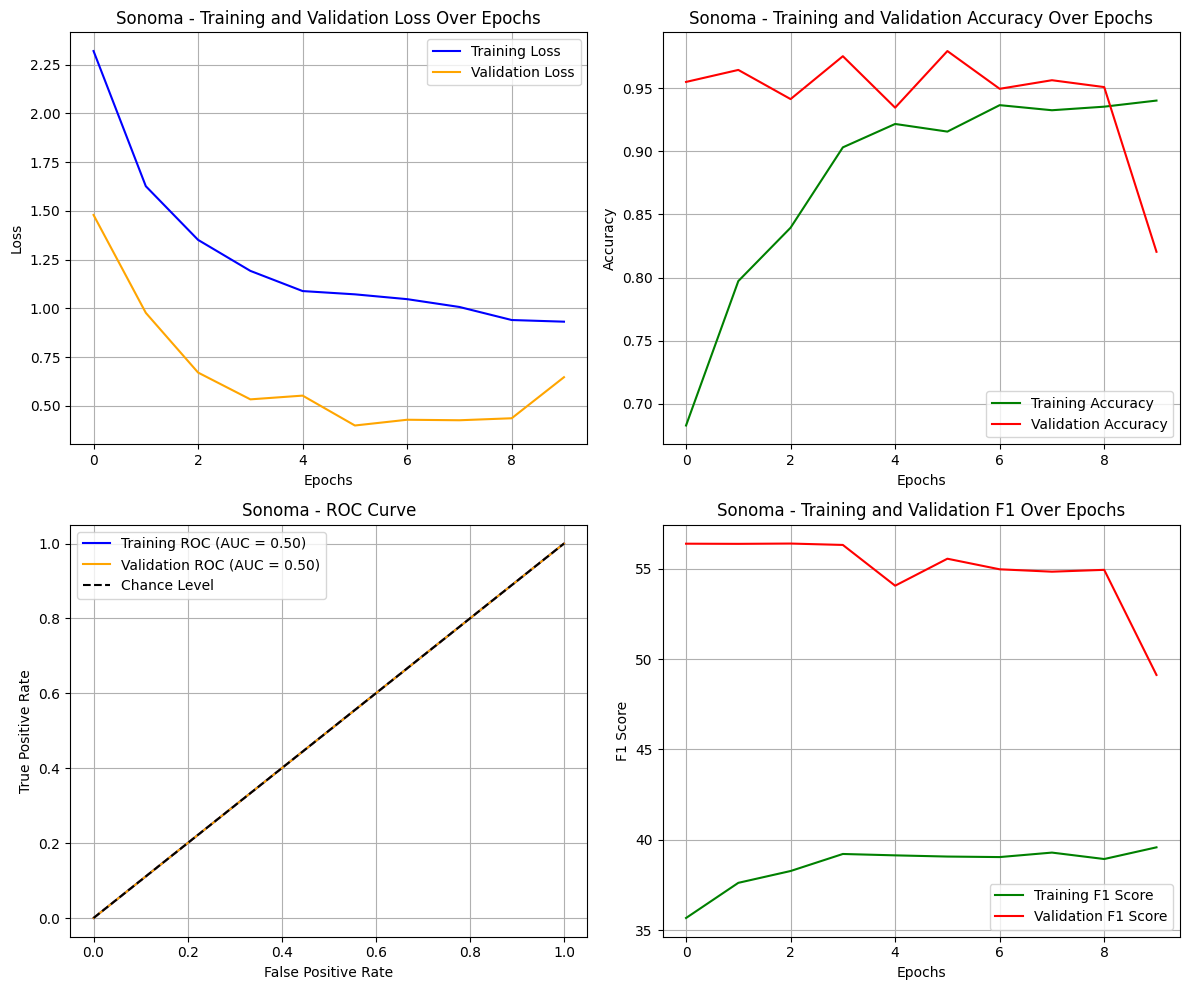

Processing data for county: El Dorado


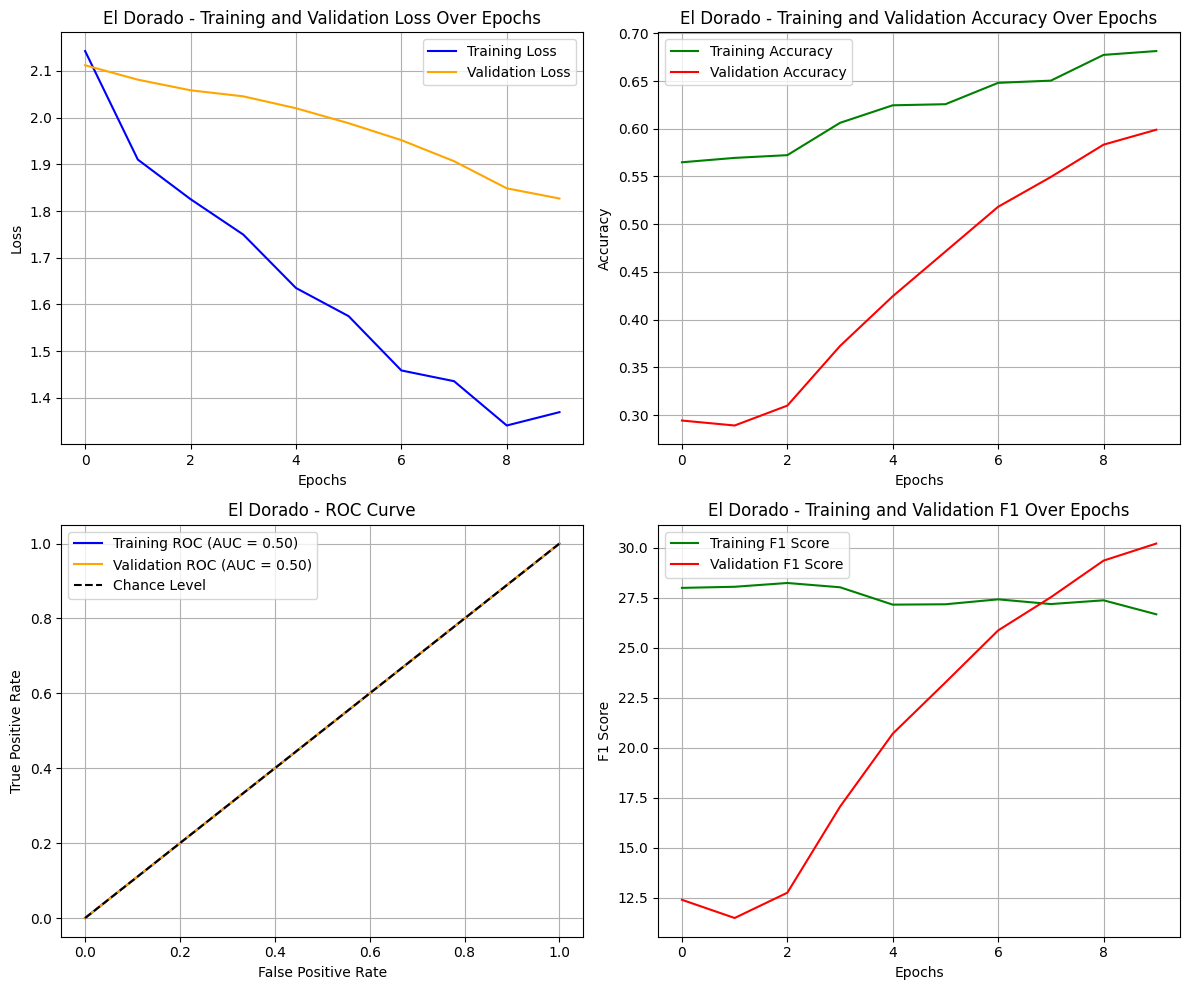

Processing data for county: Lassen


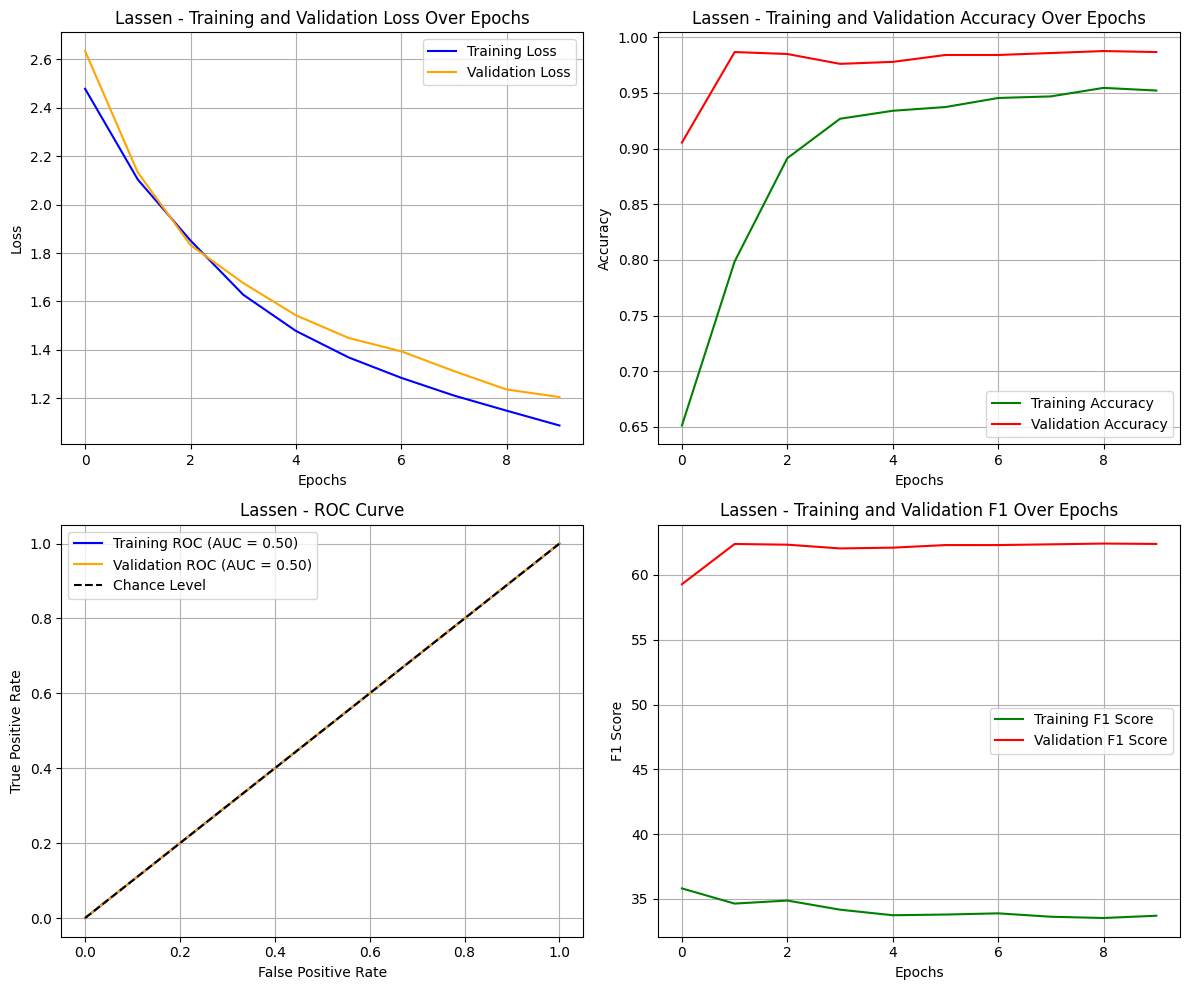

Processing data for county: Mendocino


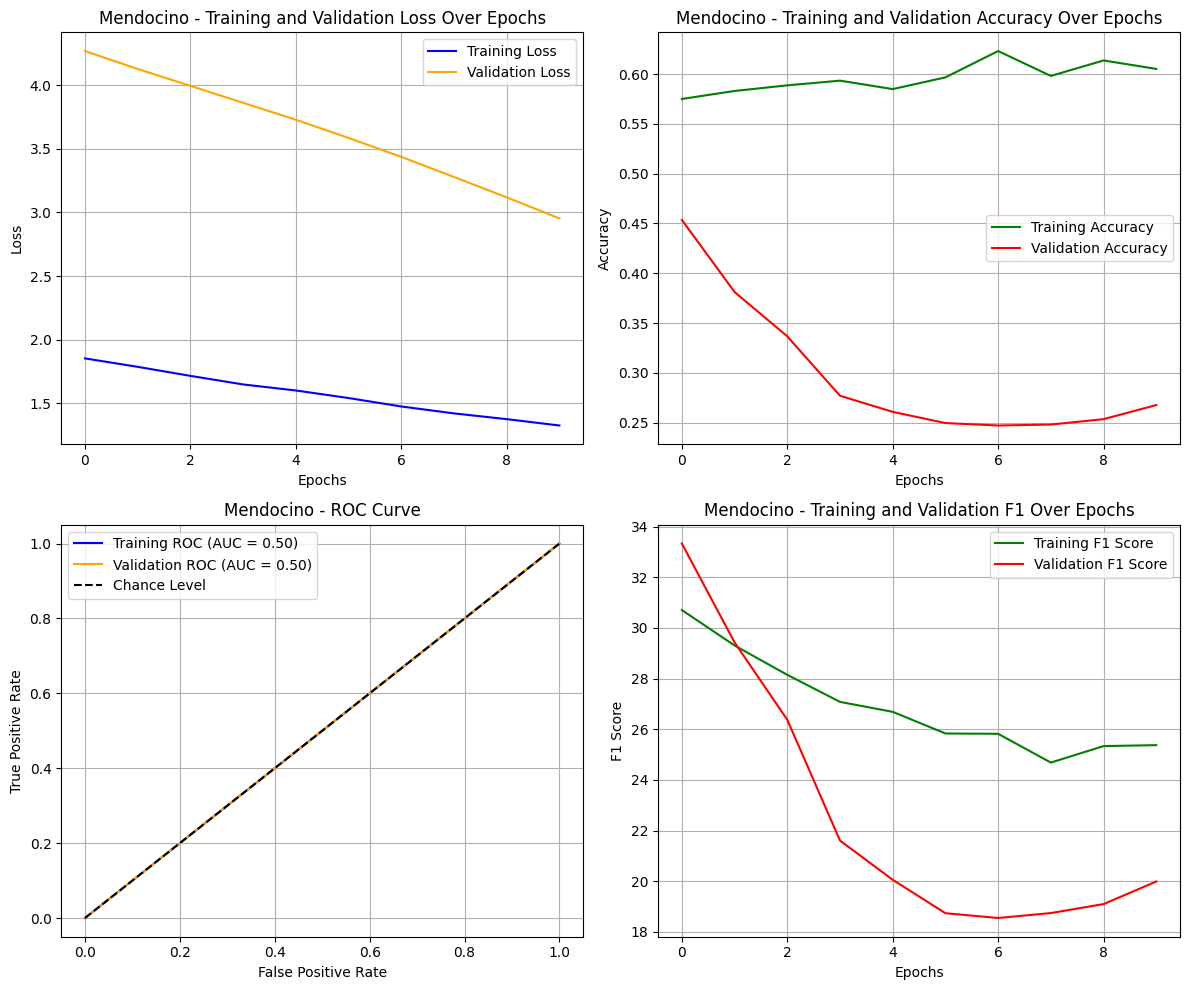

In [35]:
plot_best_model_performance(histories, train_true_fire, train_pred_fire, val_true_fire, val_pred_fire, counties)

In [36]:
sliding_window_sampled_df = sliding_over_sample(avant_2018, cities)

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x12b899800>
Traceback (most recent call last):
  File "/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 


In [ ]:
X_train, X_val, X_test= train_val_test(sliding_window_sampled_df, apres_2018, counties, sequence_length, weather_features)

In [ ]:
# Ensure fire labels are integers
X_train['y_fire'] = X_train['y_fire'].astype(int)
X_val['y_fire'] = X_val['y_fire'].astype(int)
X_test['y_fire'] = X_test['y_fire'].astype(int)

In [ ]:
results = randomized_cv_search(X_train, X_val, counties, param_grid, n_iter=3, cv_folds=3)

In [28]:
best_results_loss = {}
for county in counties:
    county_results = [r for r in results if r['county'] == county]
    best_results_loss[county] = min(county_results, key=lambda x: x['metrics']['fire_output_loss'])


In [29]:
histories, train_true_fire, train_pred_fire, val_true_fire, val_pred_fire, train_true_severity, train_pred_severity, val_true_severity, val_pred_severity = county_model_performance_best_params(
    X_train, X_val, best_results_loss, patience=10, threshold=0.8
)

Training model for county: Contra Costa
Training model for county: Kern
Training model for county: Fresno
Training model for county: San Diego
Training model for county: Riverside
Training model for county: Del Norte
Training model for county: Sacramento
Training model for county: San Bernardino
Training model for county: Los Angeles
Training model for county: Stanislaus
Training model for county: Ventura
Training model for county: Shasta
Training model for county: Placer
Training model for county: San Luis Obispo
Training model for county: Santa Barbara
Training model for county: El Dorado
Training model for county: Lassen


Processing data for county: Contra Costa


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


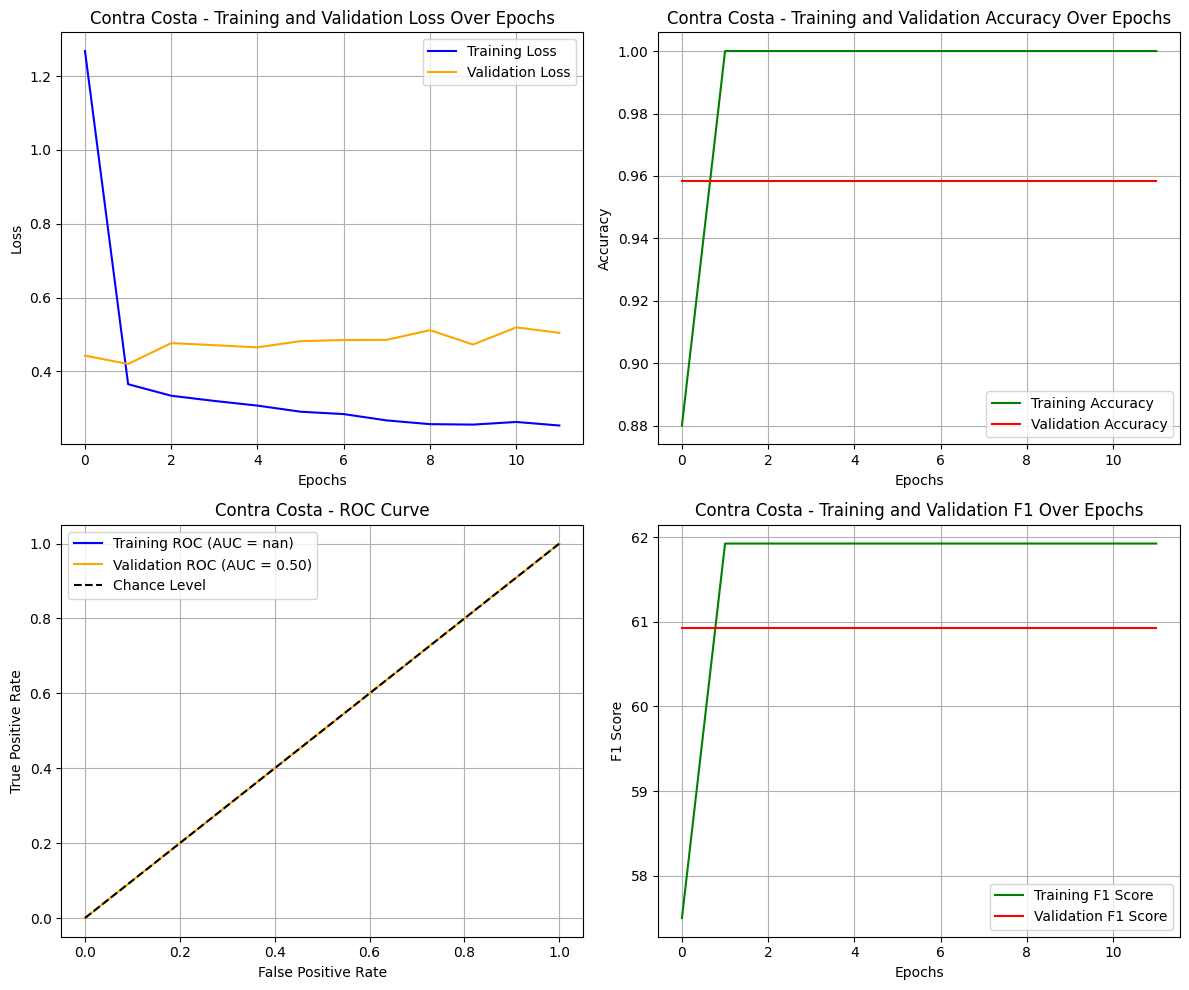

Processing data for county: Kern


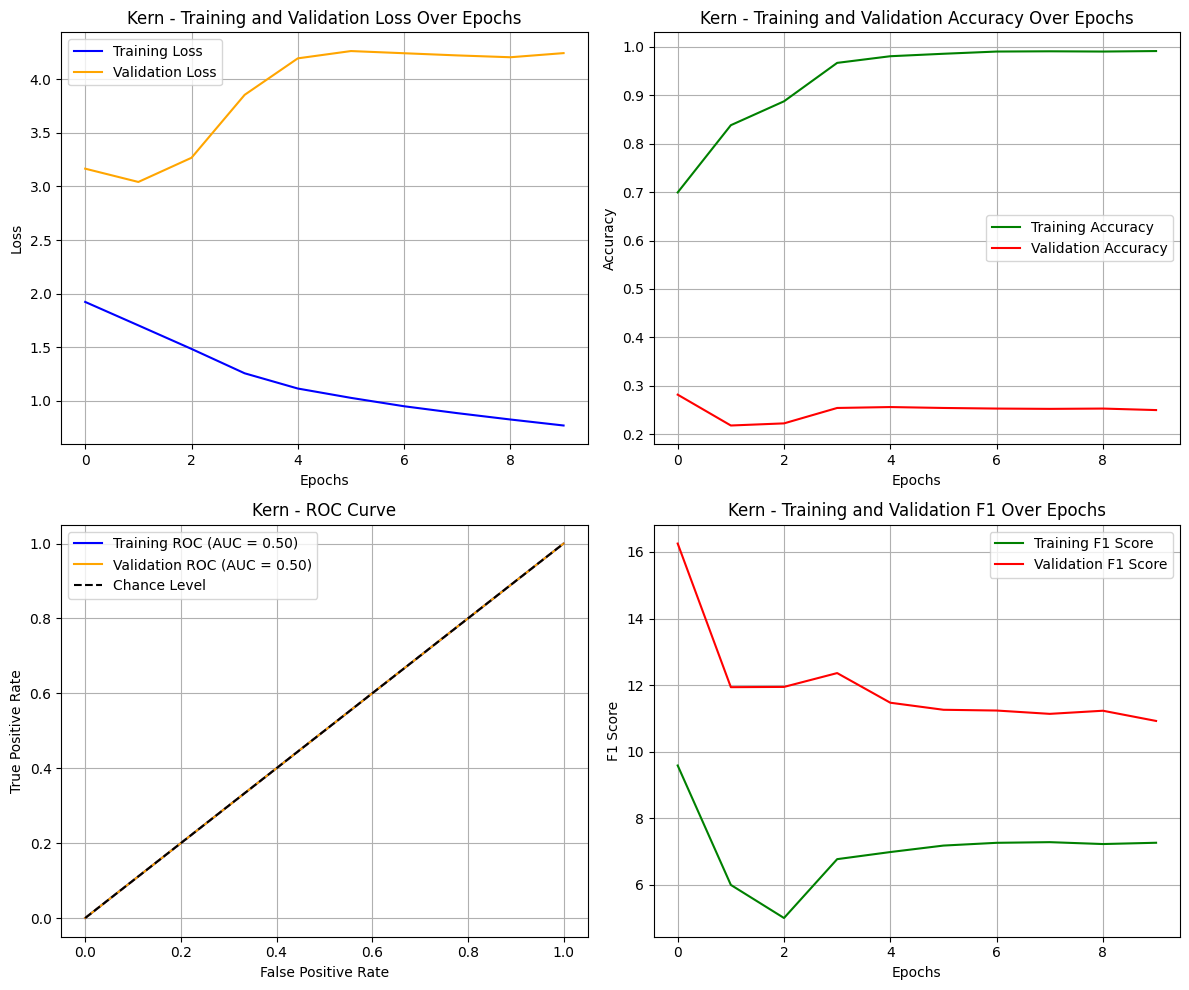

Processing data for county: Fresno


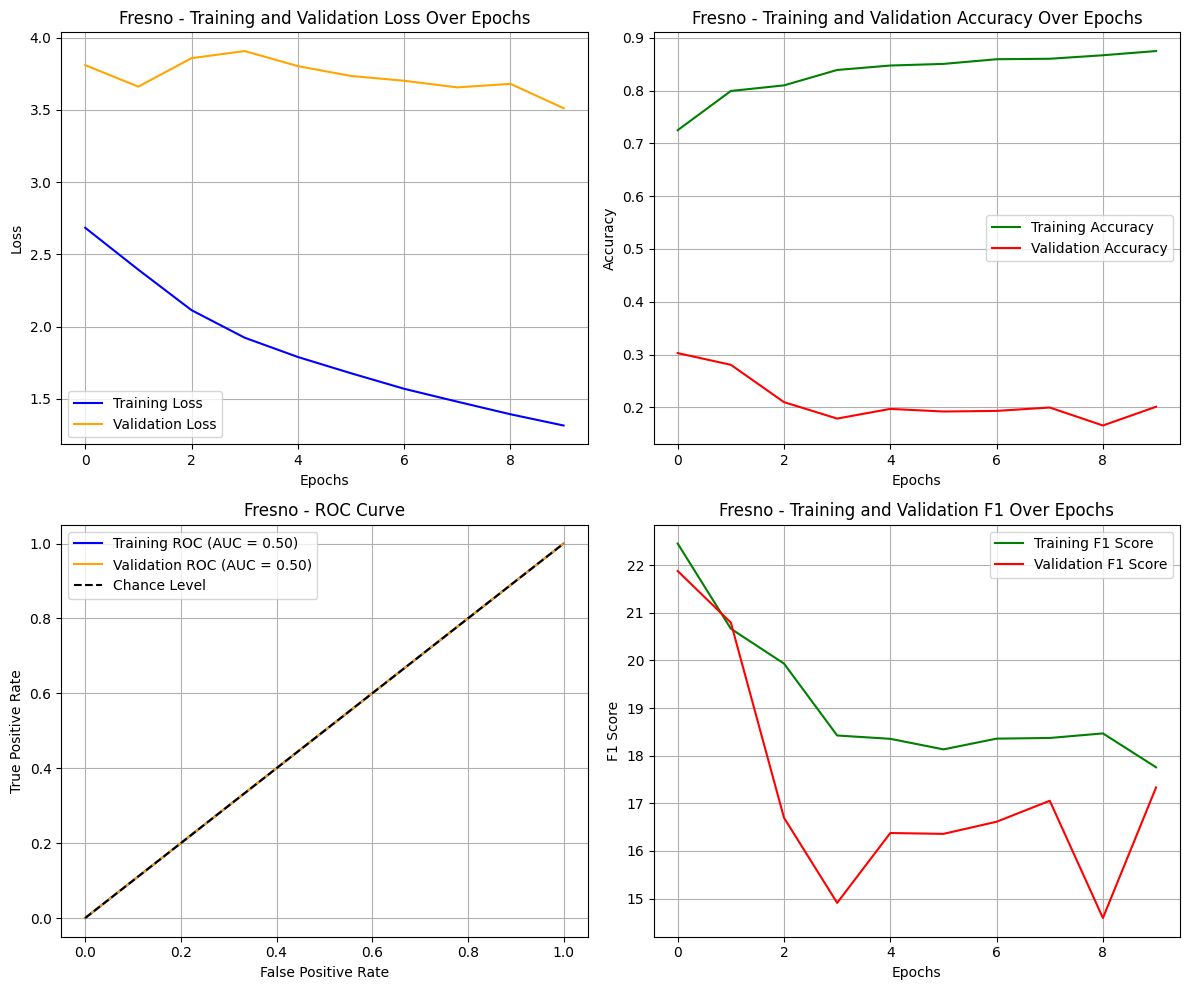

Processing data for county: San Diego


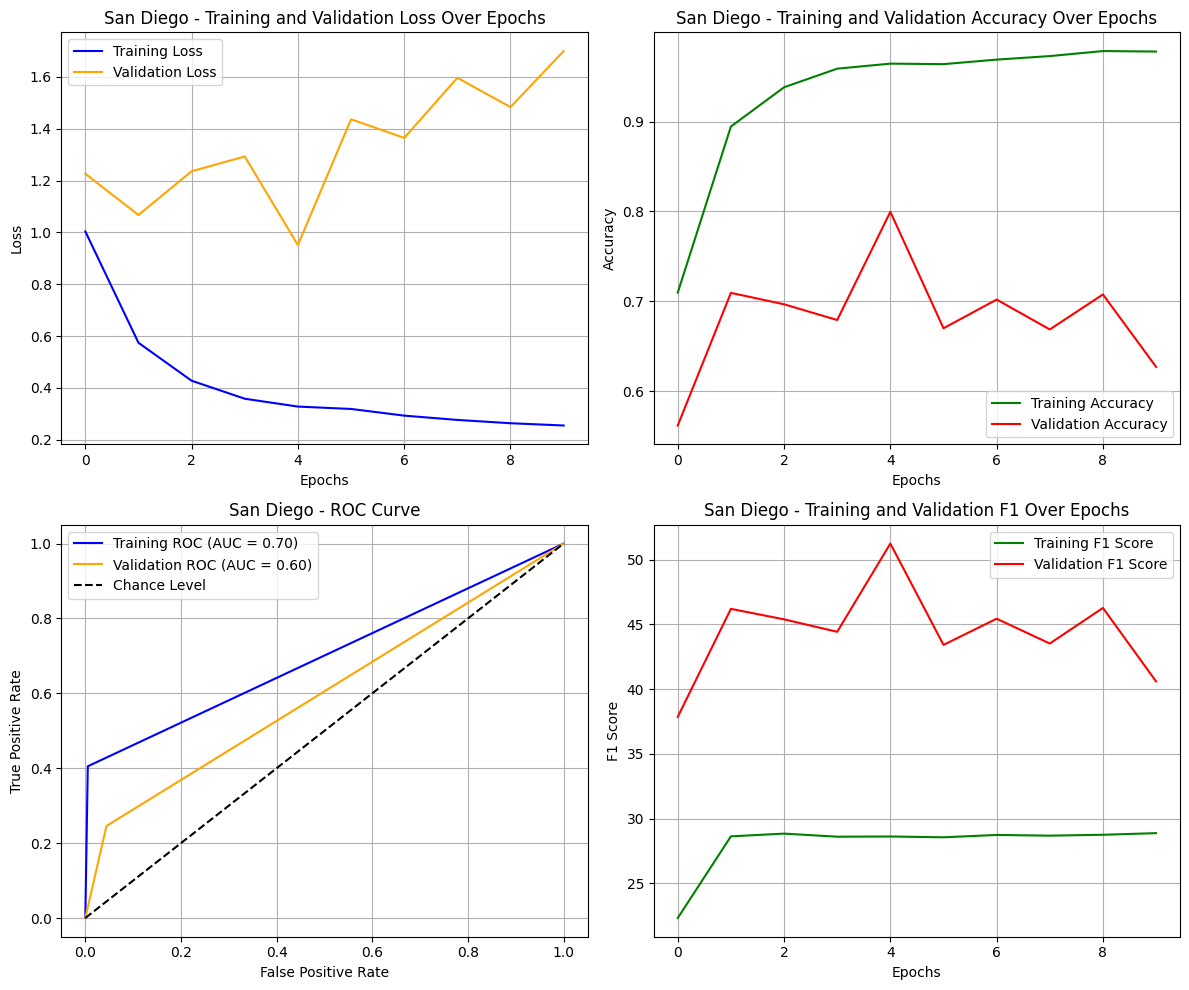

Processing data for county: Riverside


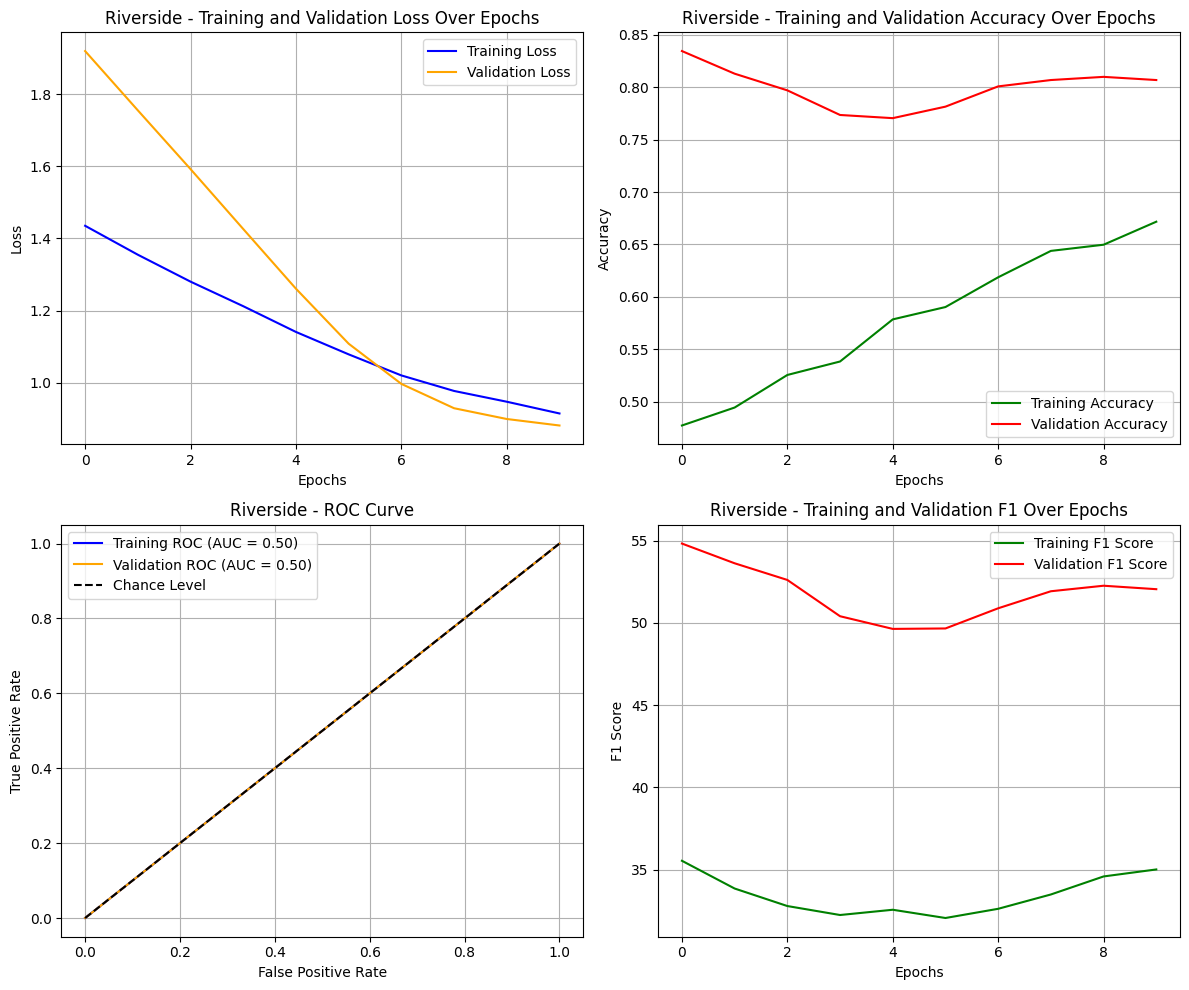

Processing data for county: Del Norte


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


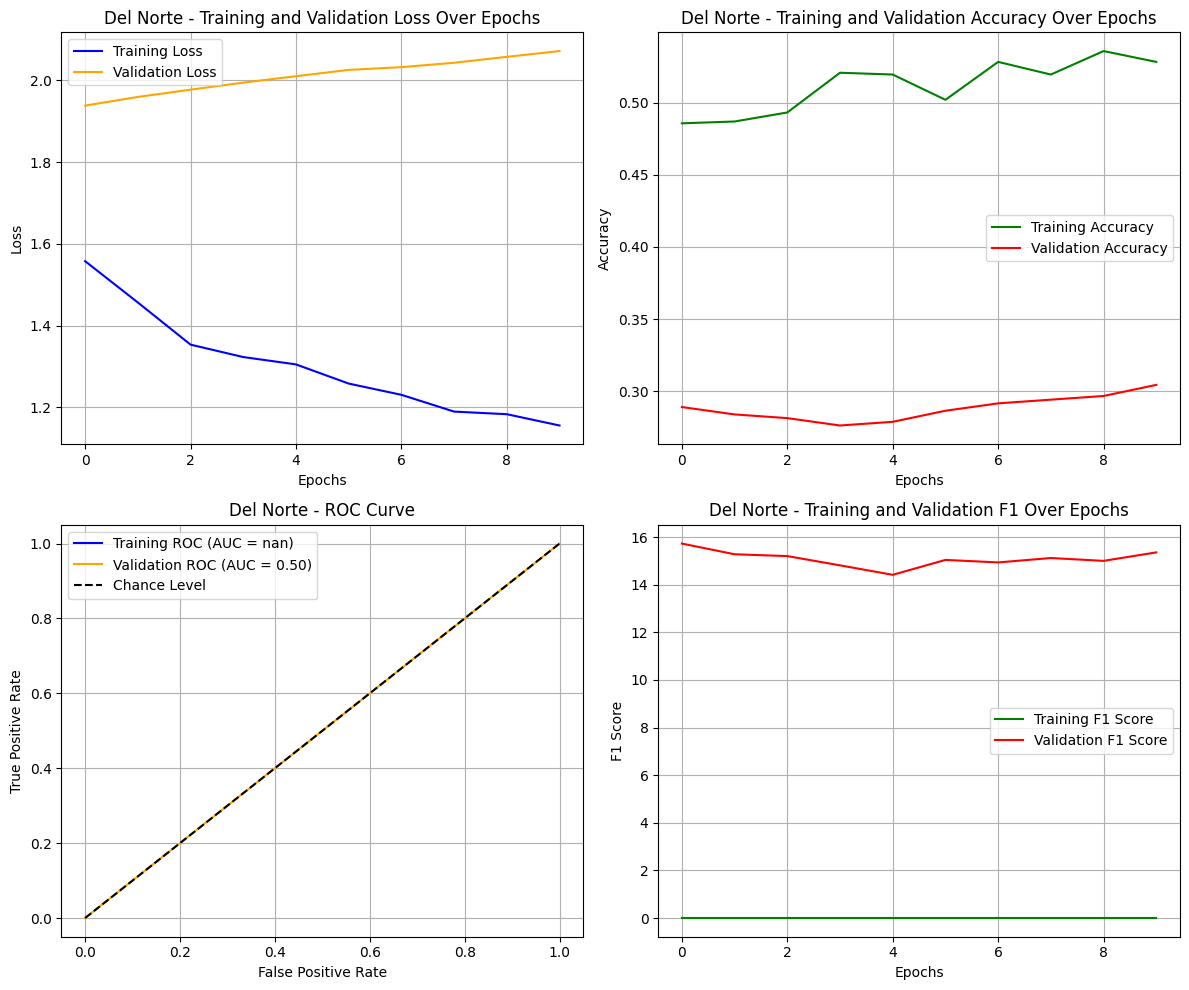

Processing data for county: Sacramento


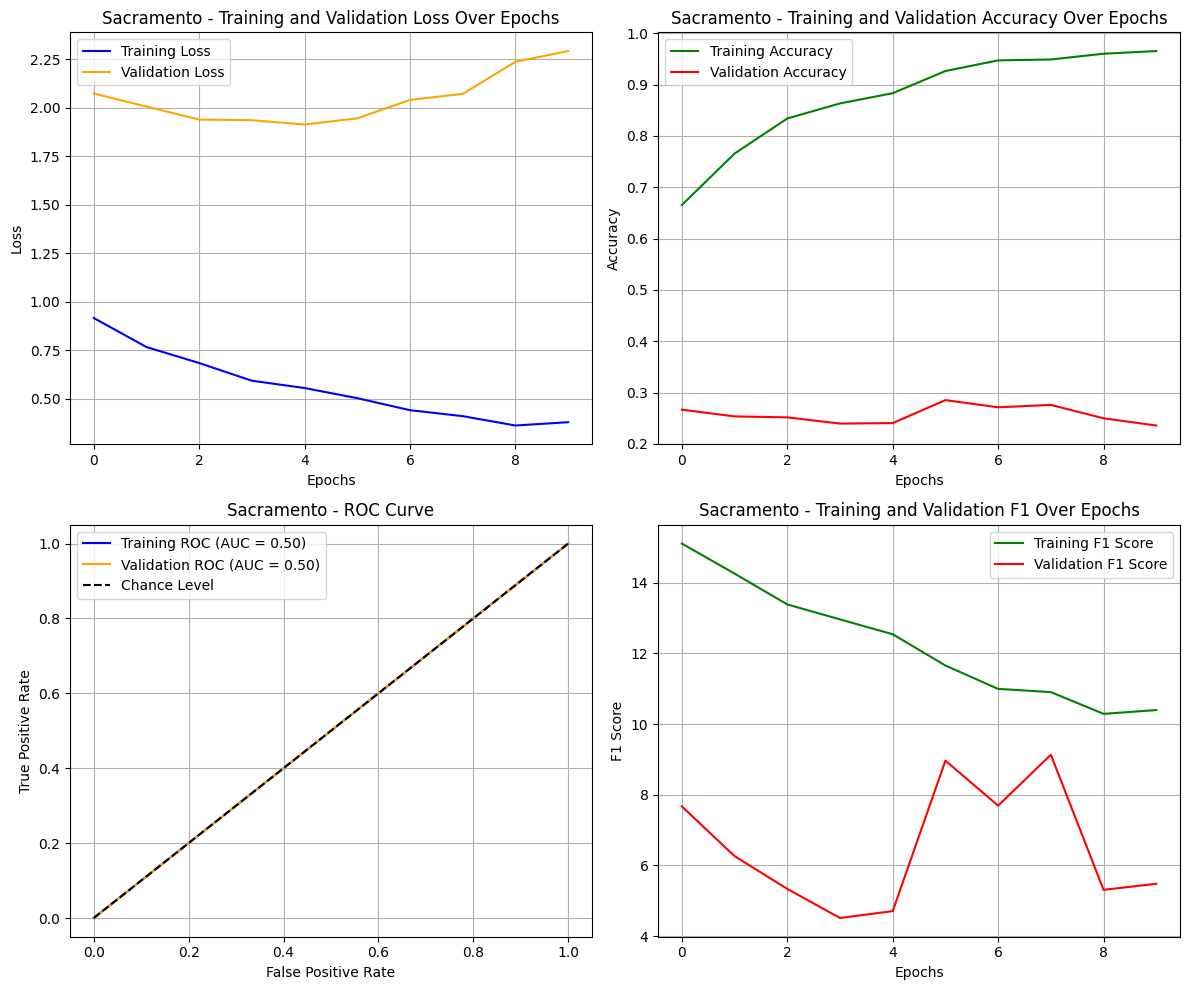

Processing data for county: San Bernardino


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


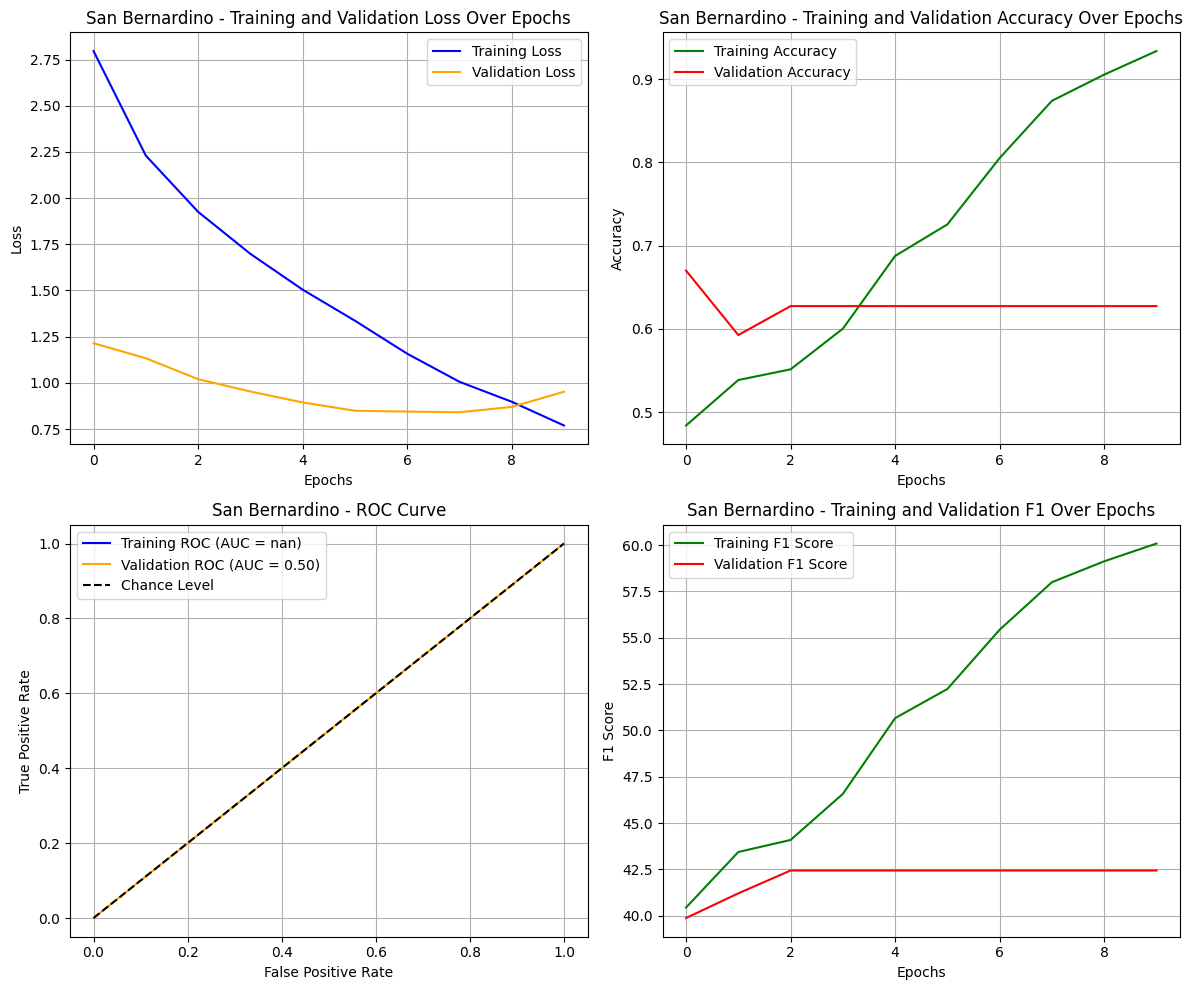

Processing data for county: Los Angeles


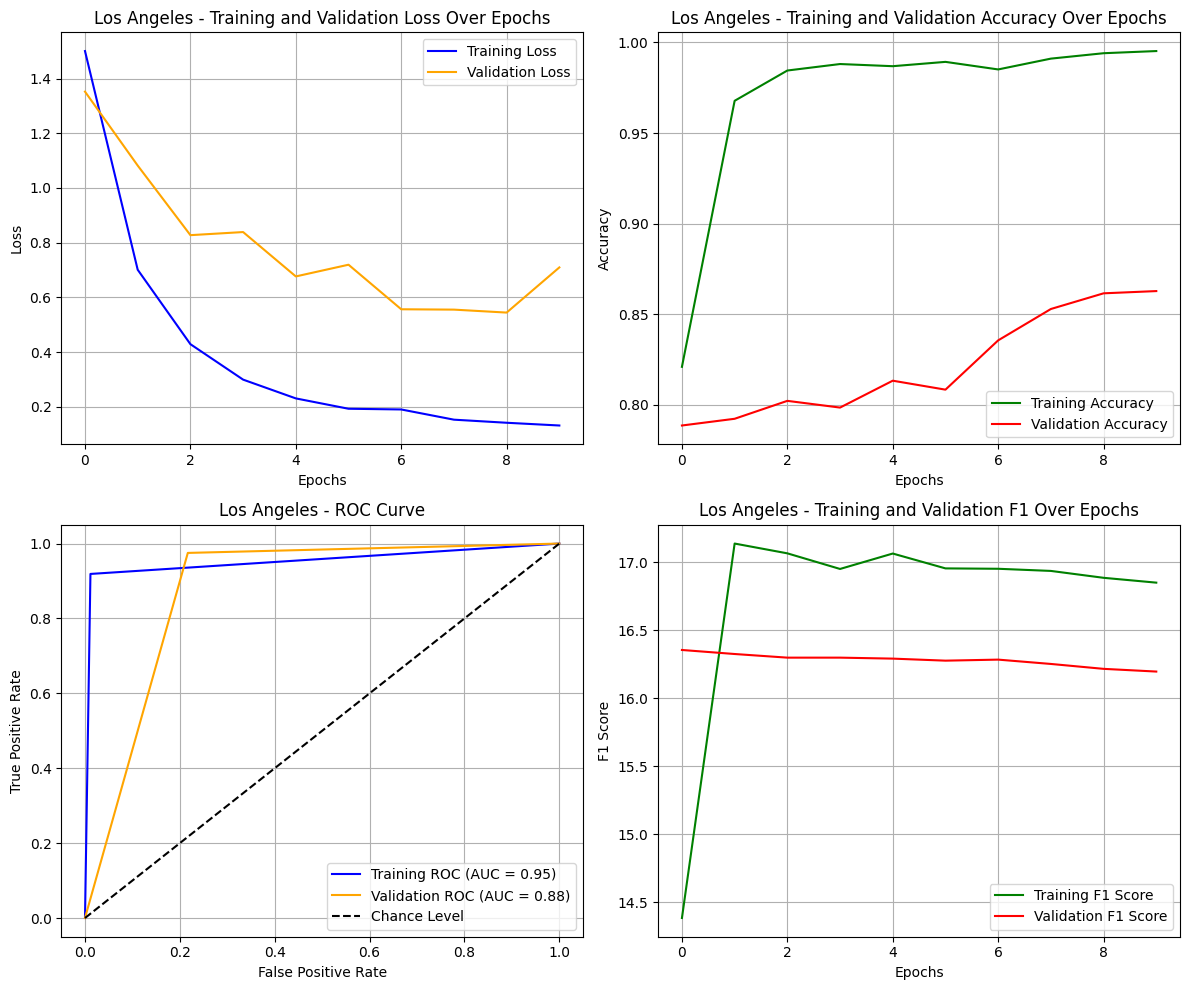

Processing data for county: Stanislaus


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


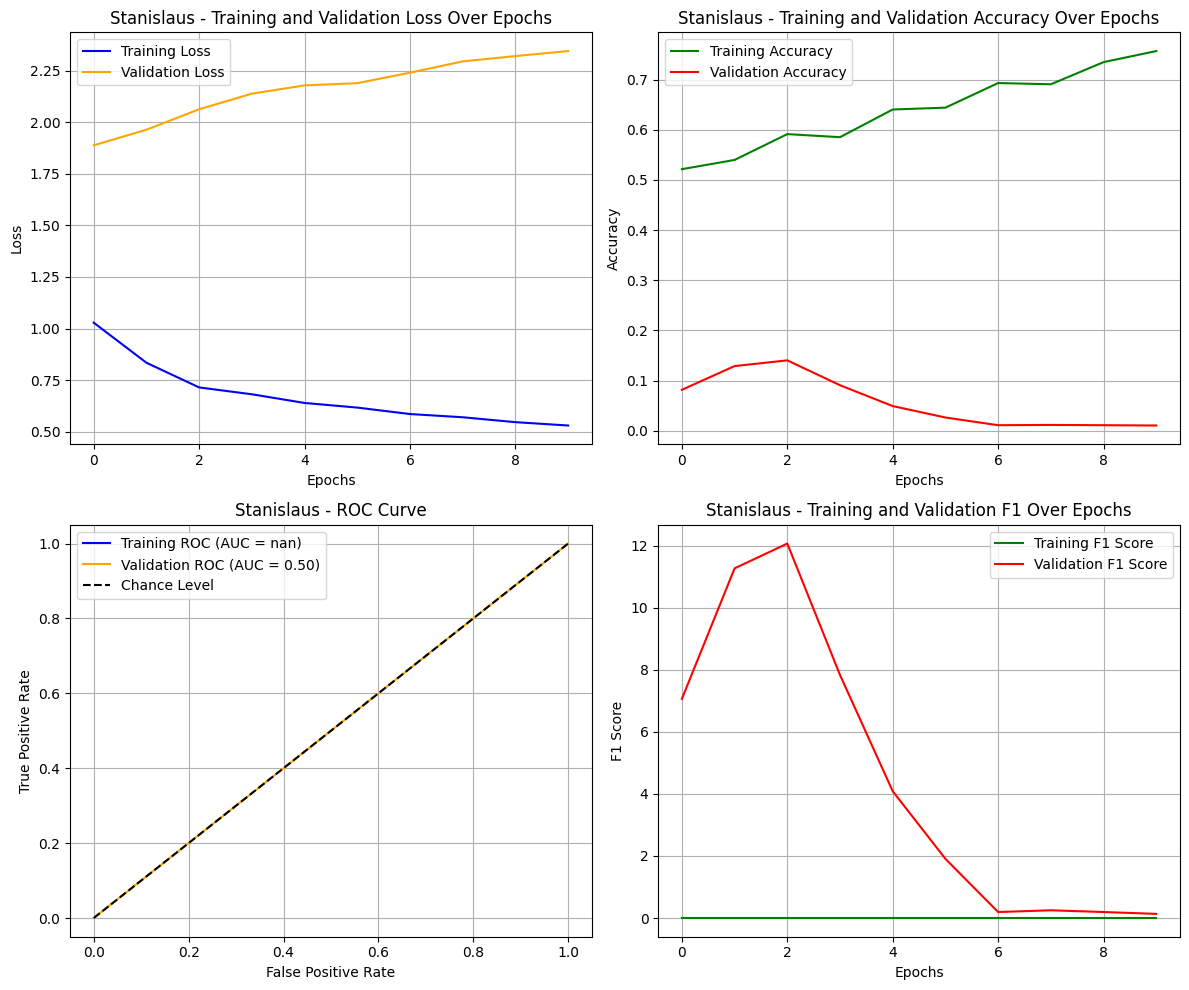

Processing data for county: Ventura


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


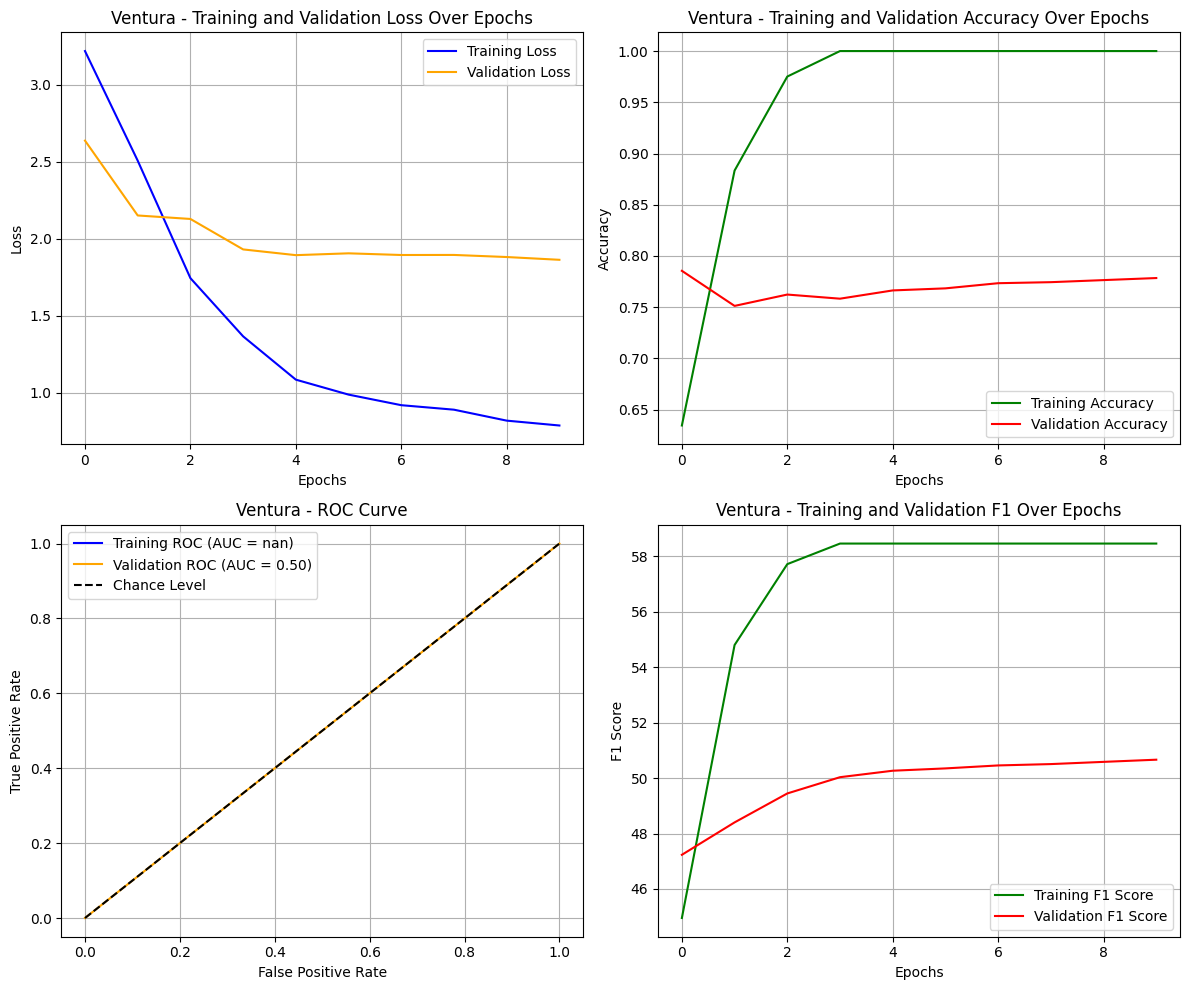

Processing data for county: Shasta


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


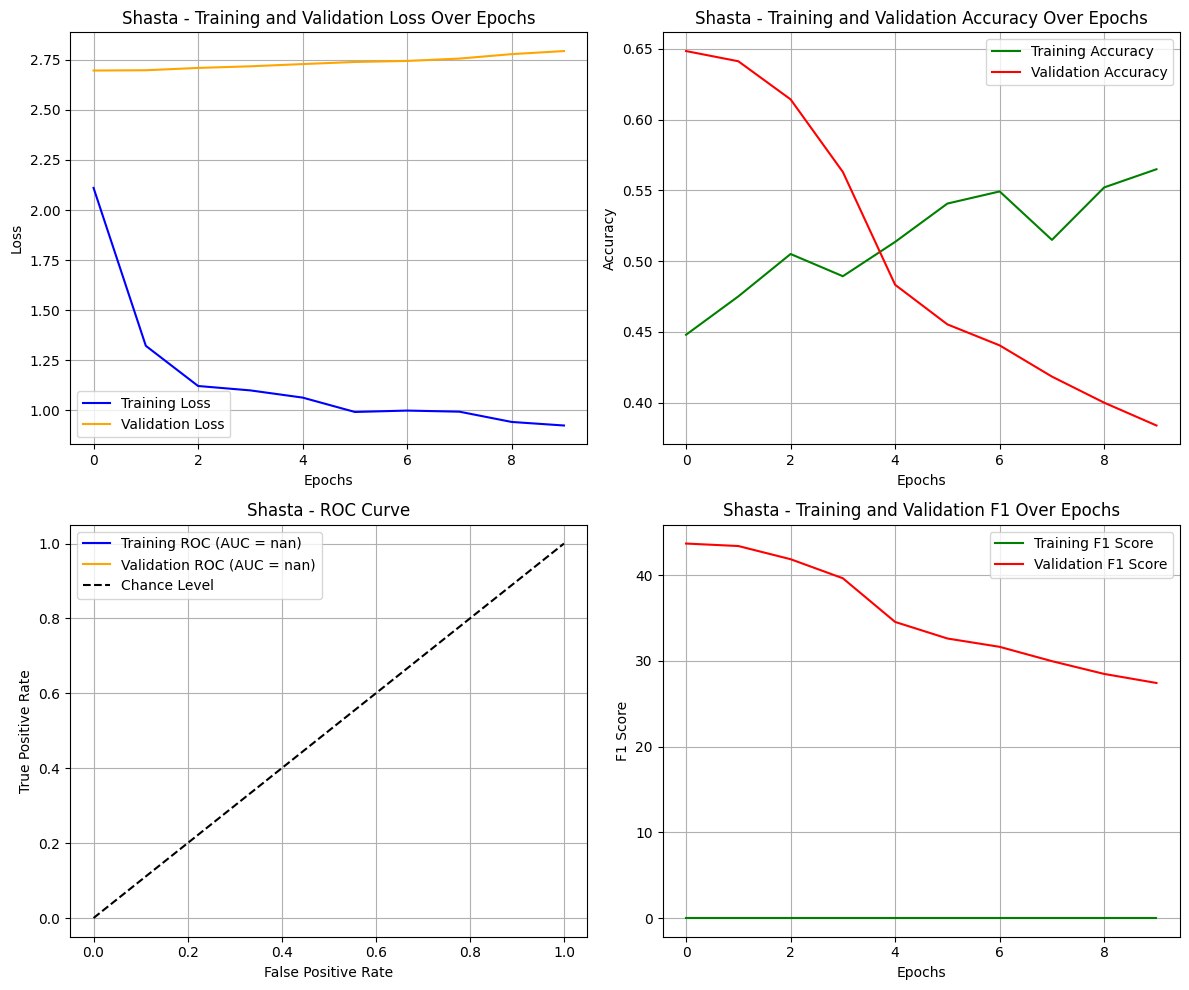

Processing data for county: Placer


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


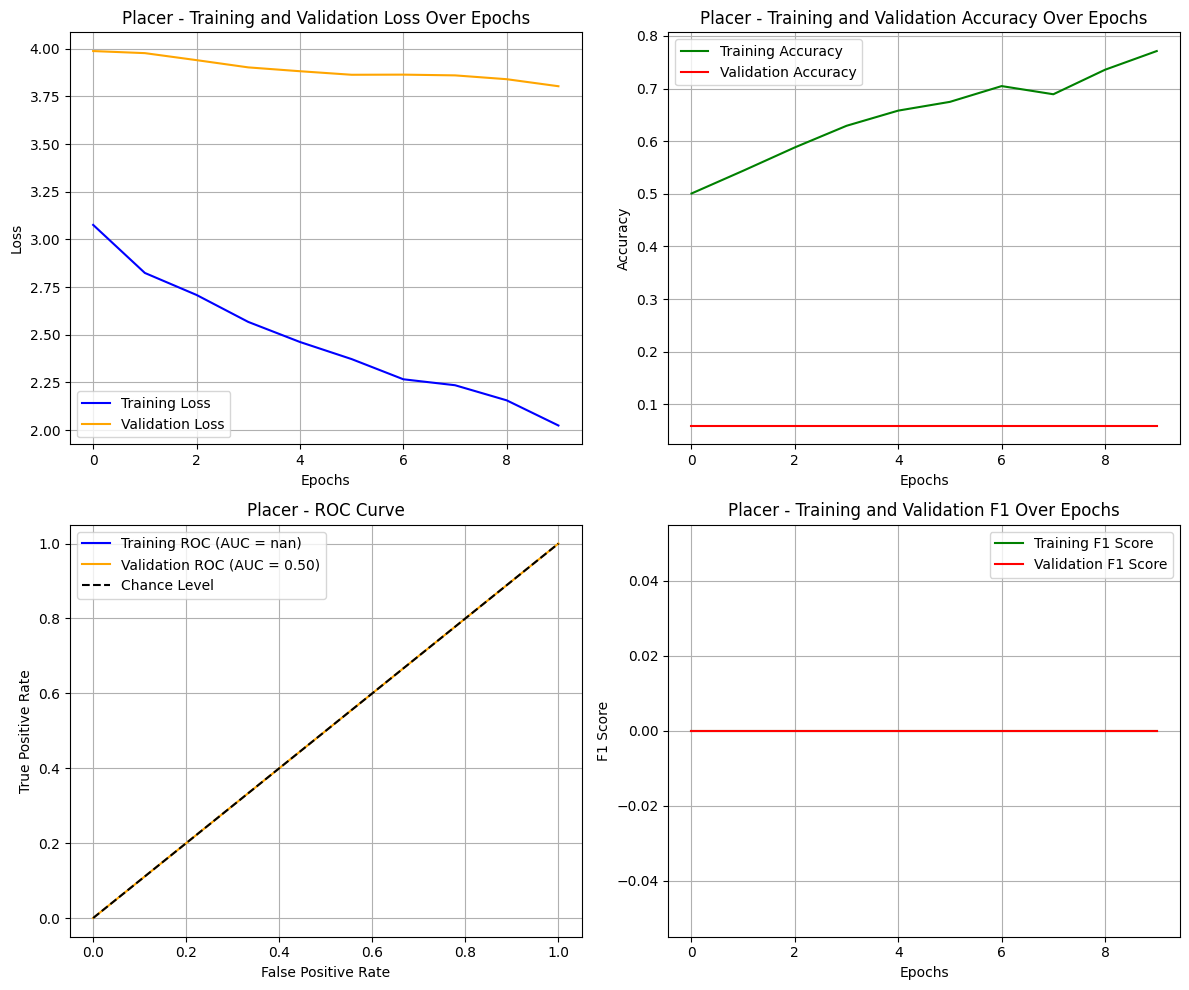

Processing data for county: San Luis Obispo


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


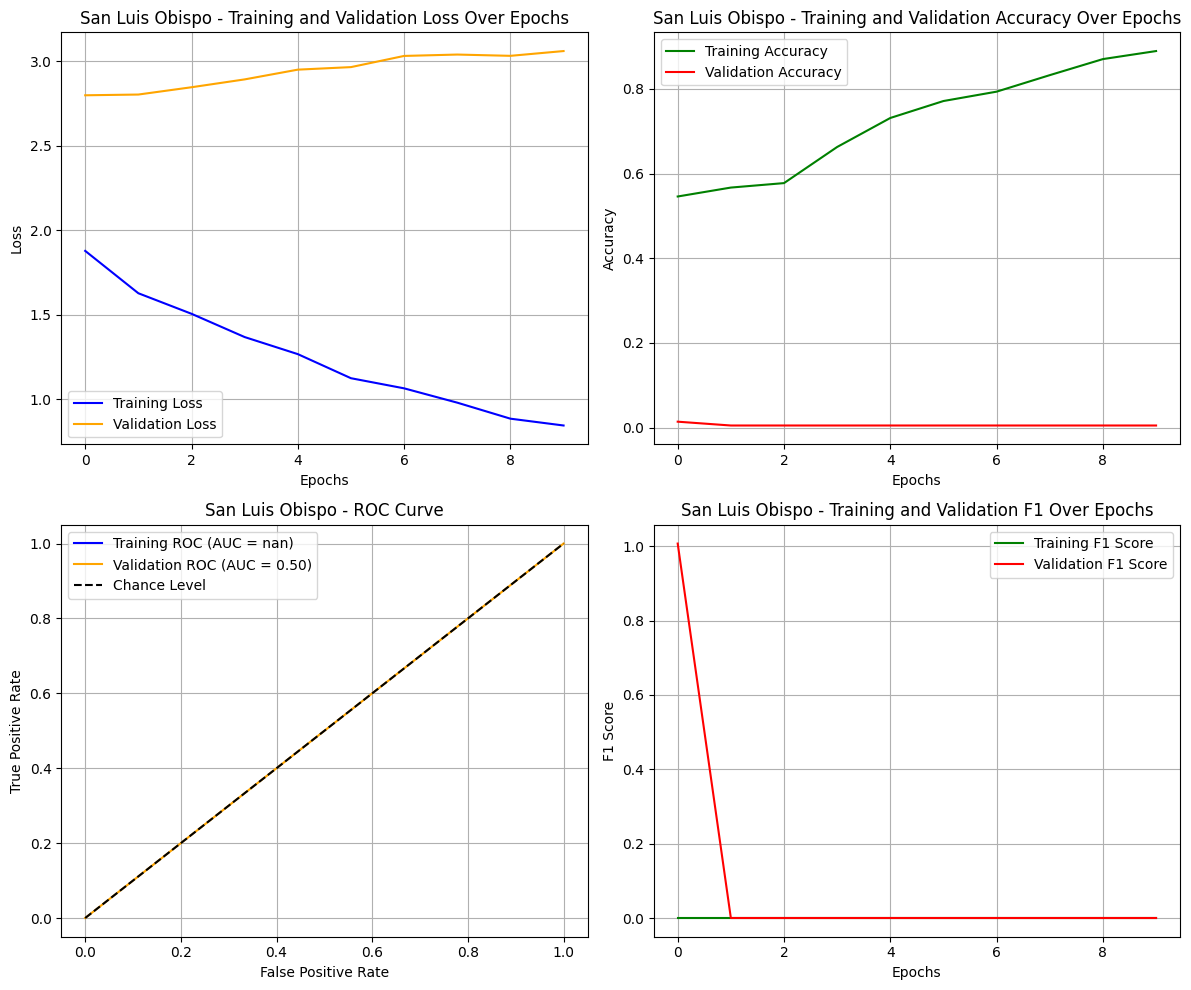

Processing data for county: Santa Barbara


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


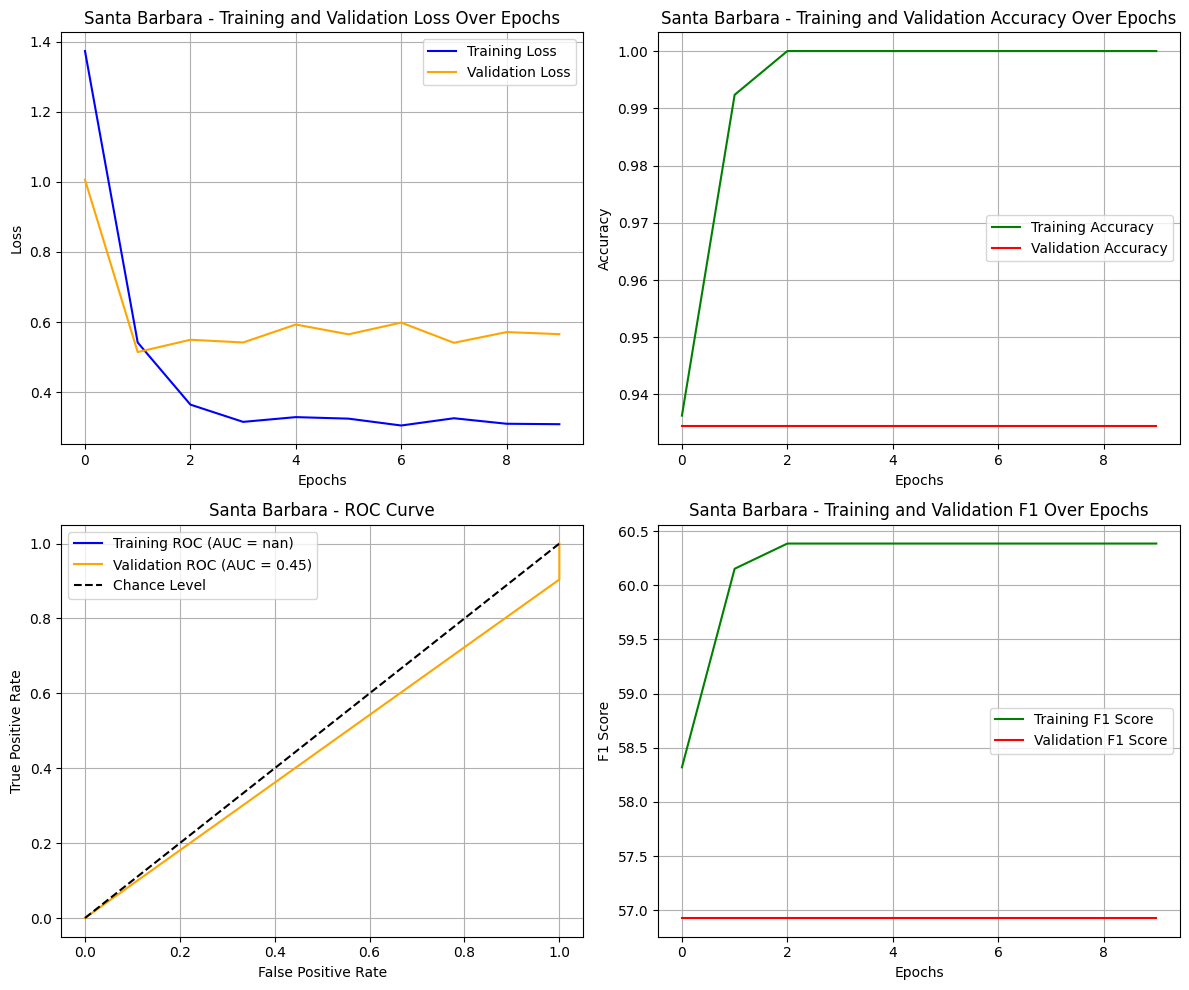

Processing data for county: El Dorado


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


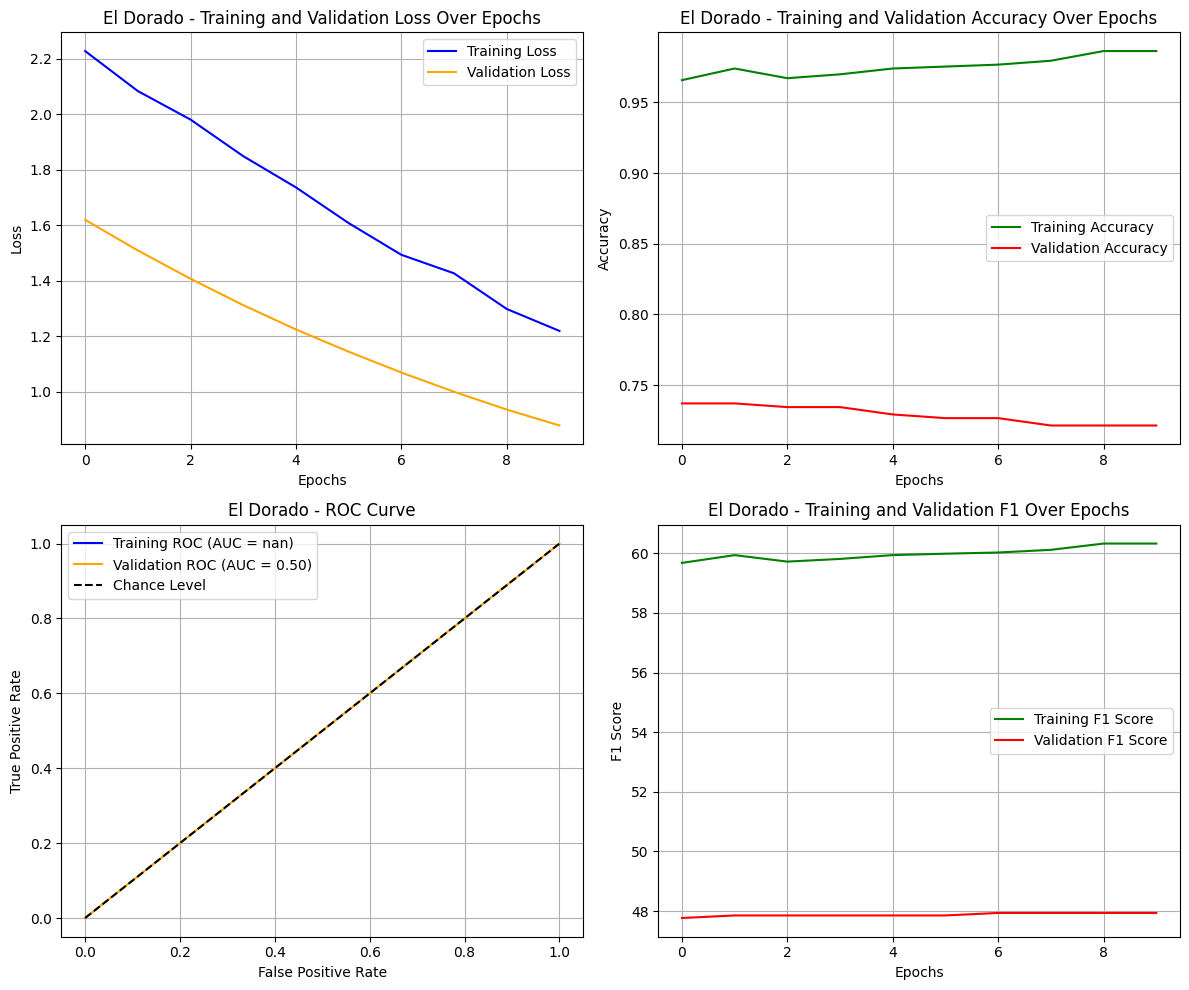

Processing data for county: Lassen


/Users/yuhanburgess/anaconda3/envs/wild_fire/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


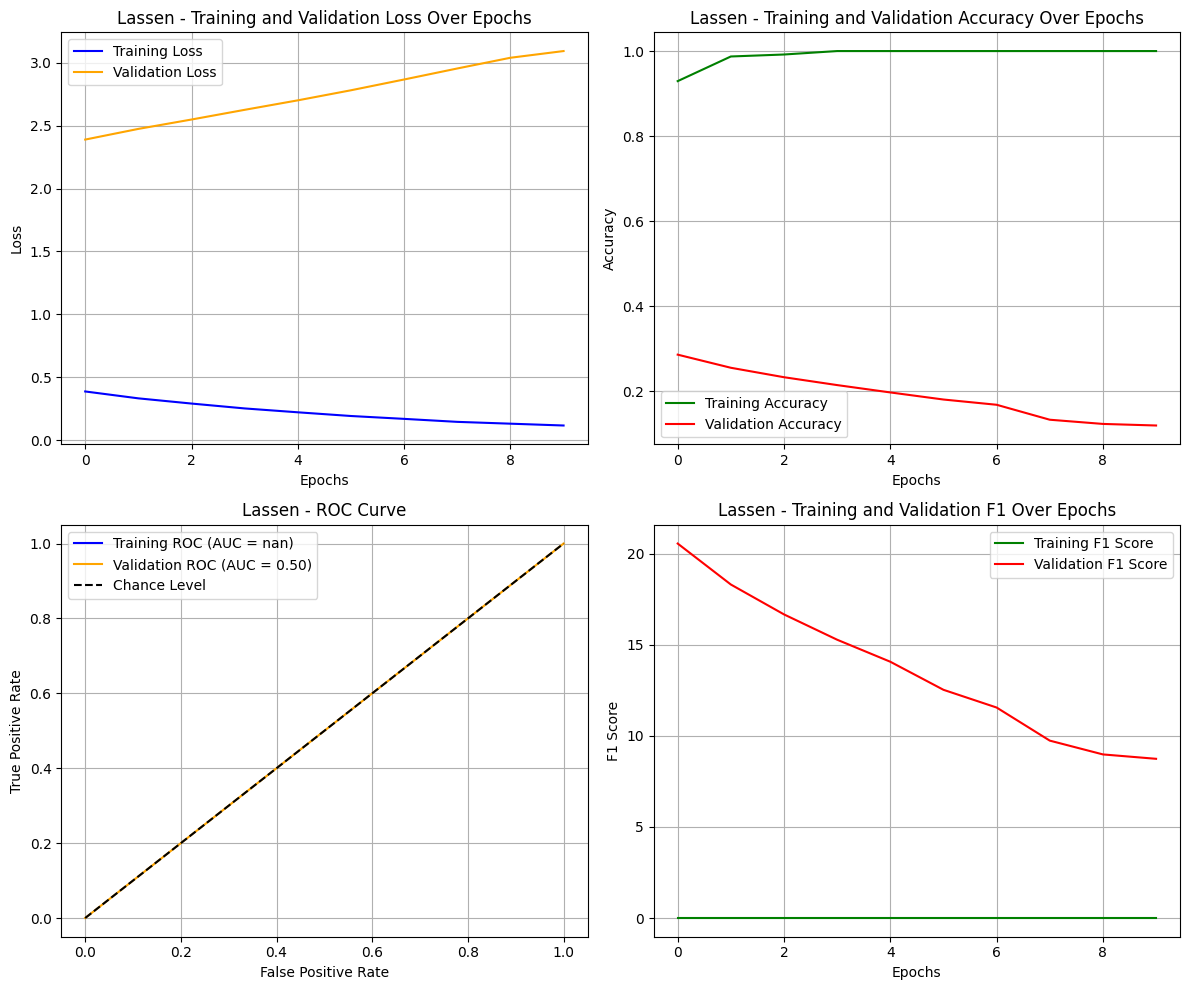

In [30]:
plot_best_model_performance(histories, train_true_fire, train_pred_fire, val_true_fire, val_pred_fire, counties)